# Test 1 - Data Preprocessing

## Date: January 23, 2020

In [67]:
#import library
import pandas as pd
import numpy as np
import glob

import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearndf.regression import RandomForestRegressorDF
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

from sklearndf.pipeline import PipelineDF, RegressorPipelineDF
from feature_engine import transformation as vt
from sklearndf.transformation import StandardScalerDF
import shap

In [10]:
#read the data
hny = pd.read_csv('../HoneyData/Honey.csv')

In [11]:
#creating the dataframe
d = {'LAT':[], 'LON':[], 'PARAMETER':[], 'YEAR':[], 'JAN':[], 'FEB':[], 'MAR':[], 'APR':[], 'MAY':[],
       'JUN':[], 'JUL':[], 'AUG':[], 'SEP':[], 'OCT':[], 'NOV':[], 'DEC':[], 'ANN':[]}
dtf = pd.DataFrame(d)

In [12]:
#combining the multiple data
##NOT USED ANYMORE
for el in glob.glob('../WeatherData/*.csv'):
    dat = pd.read_csv(el, skiprows=17)
    dat['STATE'] = el.split('/')[-1].split('.')[0]
    dtf = pd.concat([dtf, dat], sort=False)

In [13]:
#loading the lattest data
dtf = pd.read_csv('../data_processed/collatedComplex.csv')

In [14]:
dtf.head(2)

PARAMETER  YEAR    STATE  NUMCOL  LBPERCOL  TOTALLB  PRICEPERLB  \
0  ALLSKY_TOA_SW_DWN  2019  ALABAMA    7000        42   294000     3.20068   
1  ALLSKY_SFC_SW_DWN  2019  ALABAMA    7000        42   294000     3.20068   

   TOTALPRICE    JAN    FEB  ...    APR    MAY    JUN    JUL    AUG    SEP  \
0      941000  19.35  24.21  ...  36.16  39.95  41.35  40.50  37.32  32.41   
1      941000   8.91   9.21  ...  19.85  23.37  21.39  20.32  20.60  20.48   

     OCT    NOV    DEC    ANN  
0  26.12  20.58  17.82  30.31  
1  11.47  11.29   7.86  15.77  

[2 rows x 21 columns]

In [33]:
#using the monthly data, we melt all months
dtf_melted = dtf.melt(id_vars=['PARAMETER', 'YEAR', 'STATE', 'LBPERCOL', 'NUMCOL'], value_vars=['JAN', 'FEB', 'MAR', 'APR', 'MAY',
       'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']).rename(columns={'variable':'month'})
#we create combinated parameters: weather features + months
dtf_melted['PARAM+MONTH'] = dtf_melted['PARAMETER'] + '-' + dtf_melted['month']
#we then do a pivot table to have the different paramters as columns
dtf_trs = pd.pivot_table(dtf_melted, values='value', columns='PARAM+MONTH', index=['YEAR','STATE', 'NUMCOL', 'LBPERCOL']).reset_index(drop=False)

In [34]:
dtf_trs.head(3)

PARAM+MONTH  YEAR     STATE  NUMCOL  LBPERCOL  ALLSKY_SFC_SW_DWN-APR  \
0            1987   ALABAMA   46000        35                  21.79   
1            1987   ARIZONA   80000        47                  23.28   
2            1987  ARKANSAS   29000        69                  21.45   

PARAM+MONTH  ALLSKY_SFC_SW_DWN-AUG  ALLSKY_SFC_SW_DWN-DEC  \
0                            18.39                   8.56   
1                            20.49                   9.76   
2                            19.85                   7.06   

PARAM+MONTH  ALLSKY_SFC_SW_DWN-FEB  ALLSKY_SFC_SW_DWN-JAN  \
0                             9.57                   9.02   
1                            12.31                   9.92   
2                             9.88                   9.08   

PARAM+MONTH  ALLSKY_SFC_SW_DWN-JUL  ...  WS2M-DEC  WS2M-FEB  WS2M-JAN  \
0                            21.76  ...      0.27      0.30      0.28   
1                            25.00  ...      1.20      1.27      1.34   
2                            21.03  ...      2.46      2.40      2.44   

PARAM+MONTH  WS2M-JUL  WS2M-JUN  WS2M-MAR  WS2M-MAY  WS2M-NOV  WS2M-OCT  \
0                0.26      0.23      0.29      0.22      0.28      0.32   
1                1.51      1.30      1.54      1.32      1.22      1.06   
2                1.68      1.52      2.35      1.67      2.37      1.95   

PARAM+MONTH  WS2M-SEP  
0                0.28  
1                1.10  
2                1.56  

[3 rows x 88 columns]

In [37]:
#yearly data | for visualization purpose
dft_yearly = pd.pivot_table(dtf_melted, values='value', columns='PARAMETER', index=['YEAR','STATE', 'NUMCOL', 'LBPERCOL']).reset_index(drop=False)

In [38]:
#pivot table for the parameters
#dtf_trs_month = pd.pivot_table(dtf_melted, values='value', columns='PARAM+MONTH', index=['YEAR','STATE', 'LBPERCOL', 'NUMCOL']).reset_index(drop=False)

In [39]:
#this part is not used anymore

#dtf = pd.merge(hny, dtf_trs, left_on=['YEAR', 'STATE'], right_on=['YEAR','STATE'], how='inner')
#dtf_year = pd.merge(hny, dtf_trs_year, left_on=['YEAR', 'STATE'], right_on=['YEAR','STATE'])
#dtf_month = pd.merge(hny, dtf_trs_month, left_on=['YEAR', 'STATE'], right_on=['YEAR','STATE'], how='inner')

In [40]:
#saving data

#dtf.to_csv('../data_processed/usa_honey_data_month_as_row.csv')
#dtf_year.to_csv('../data_processed/data_pivoted_year.csv')

## Part II - Feature Engineering

/Users/spezzata/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


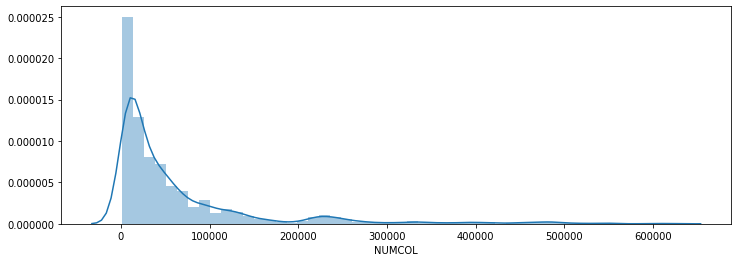

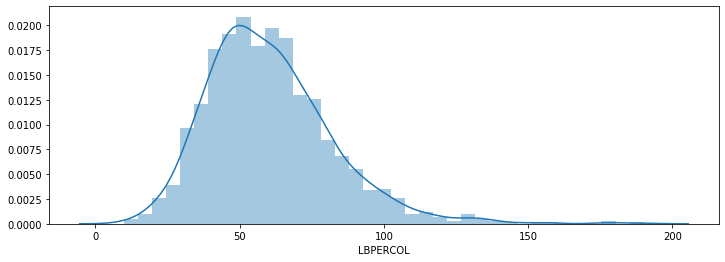

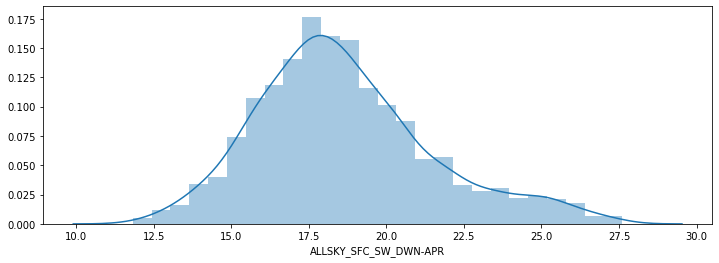

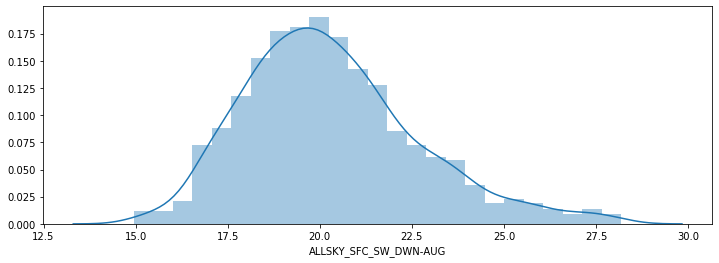

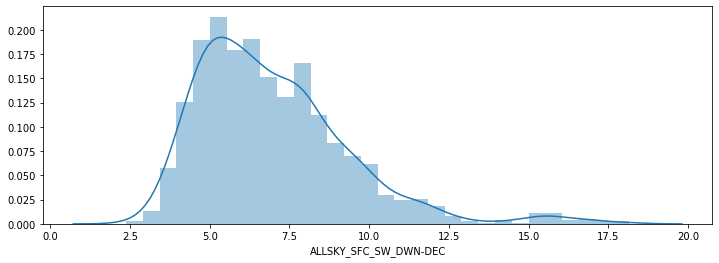

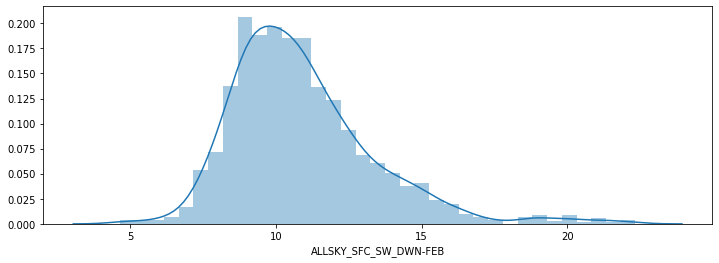

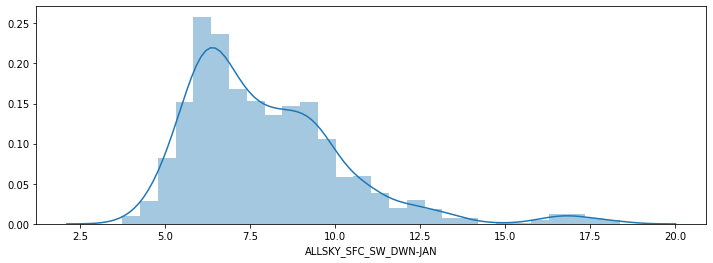

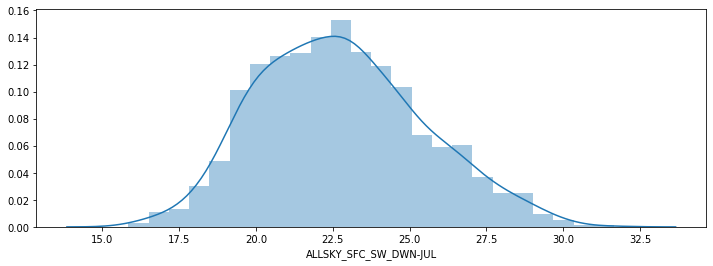

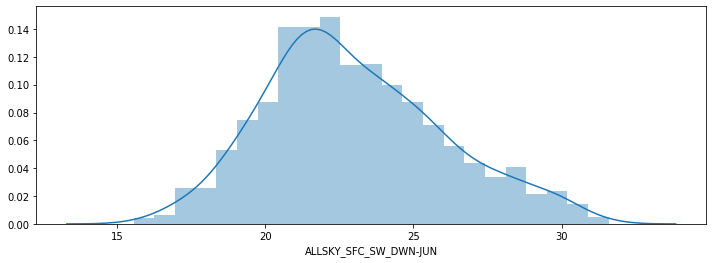

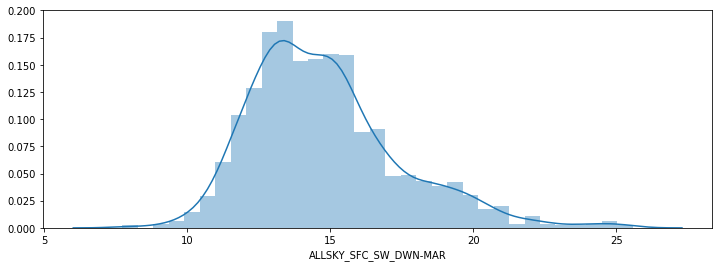

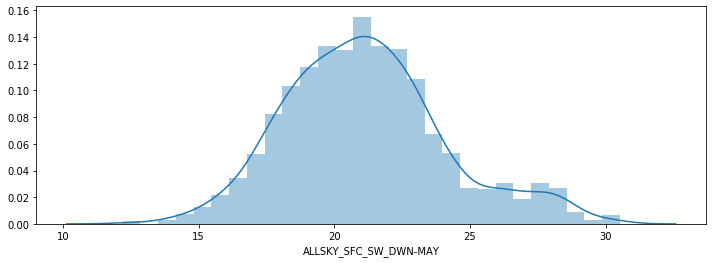

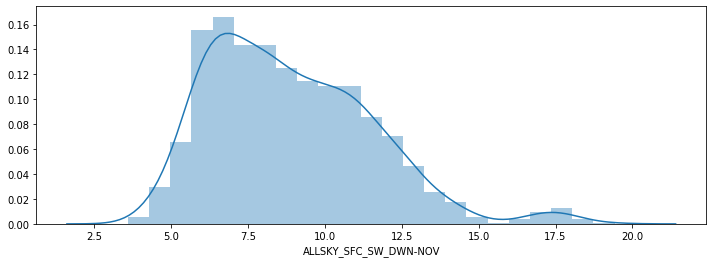

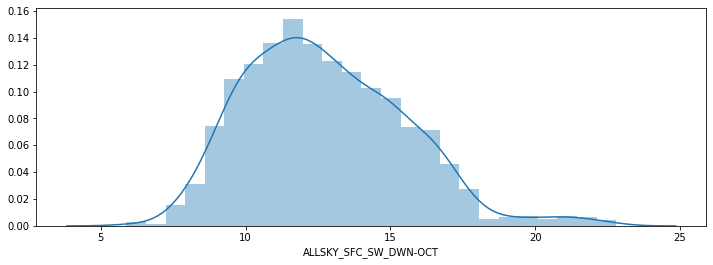

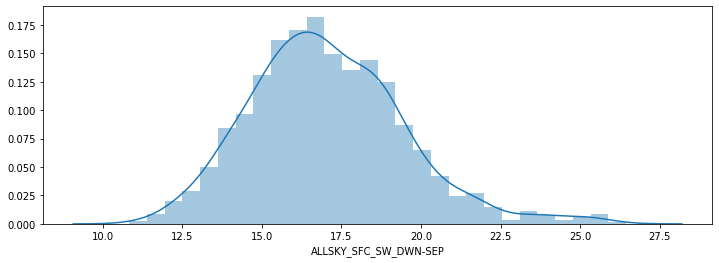

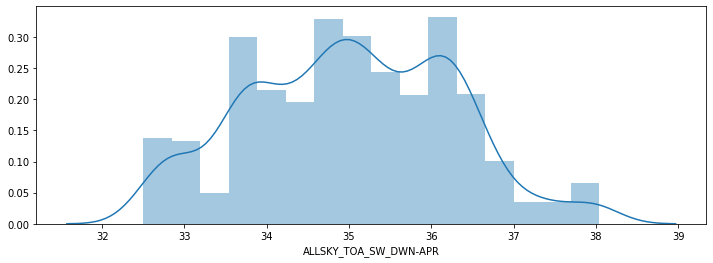

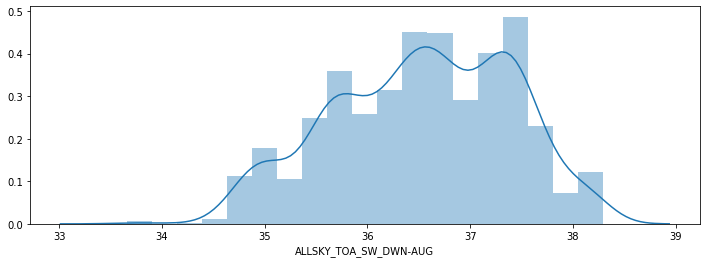

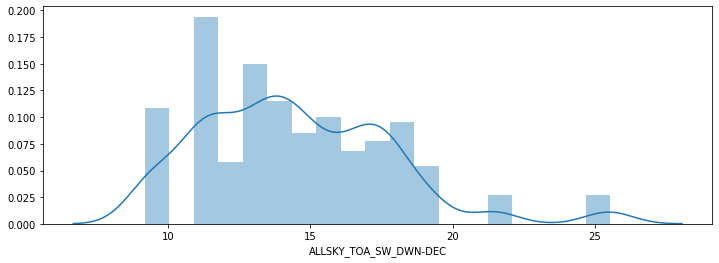

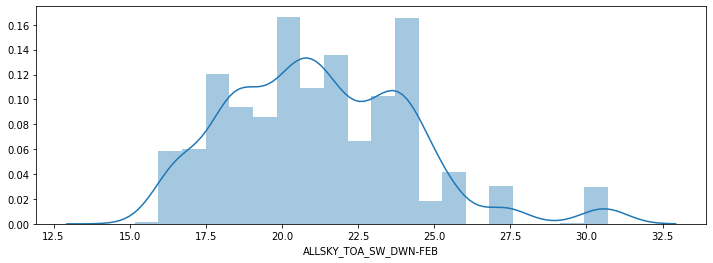

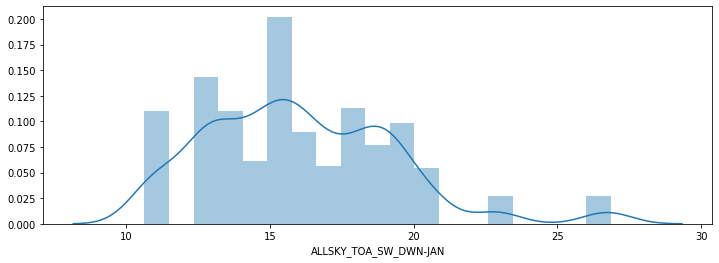

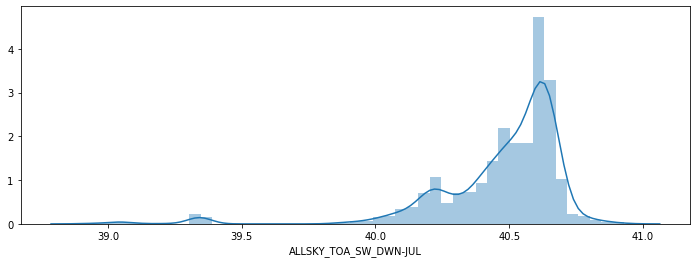

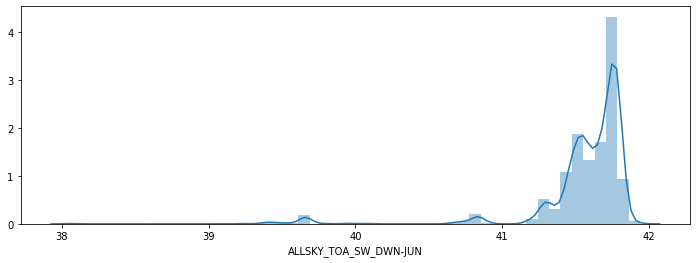

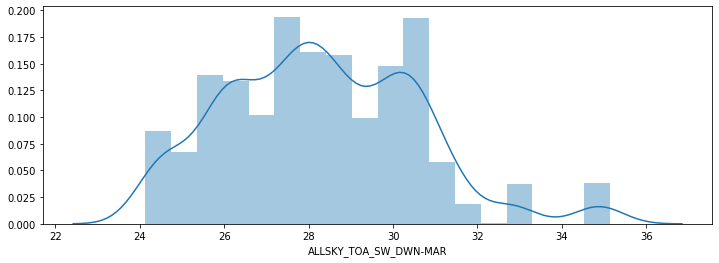

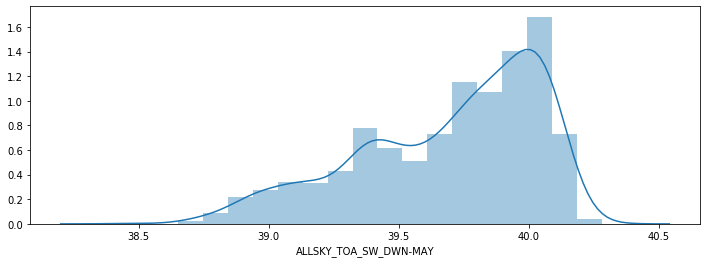

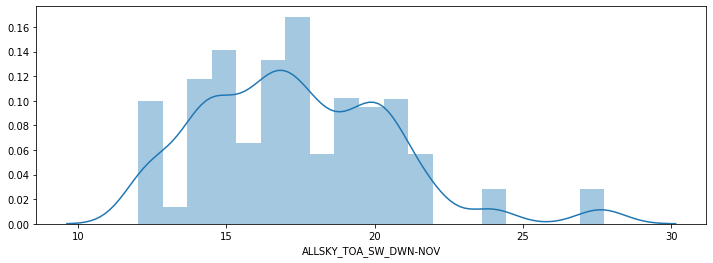

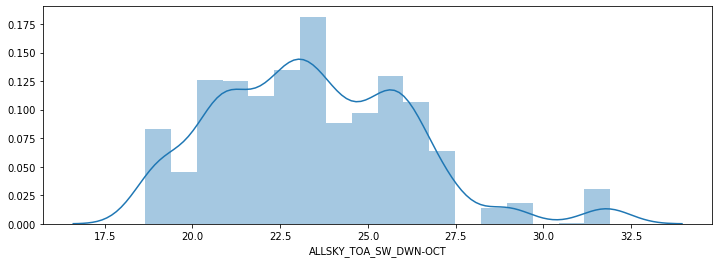

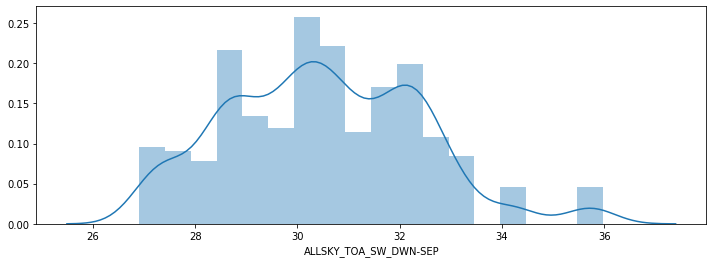

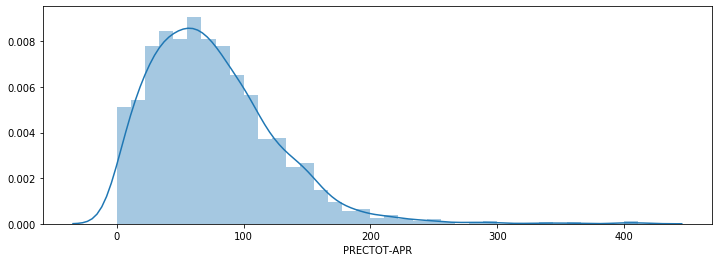

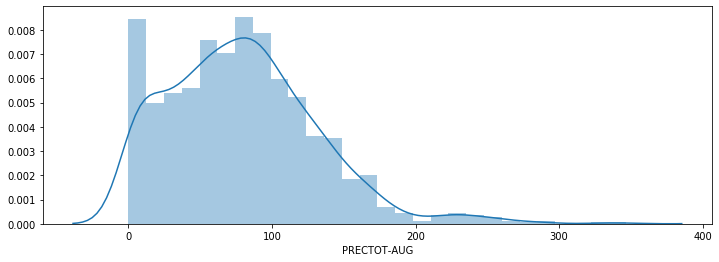

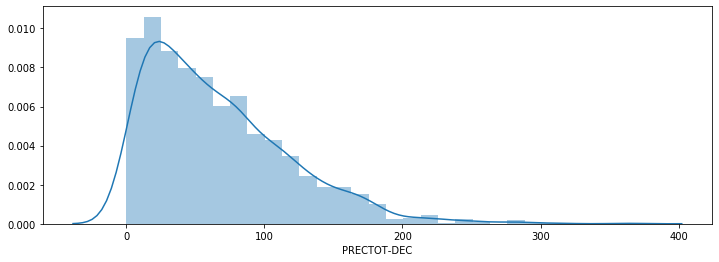

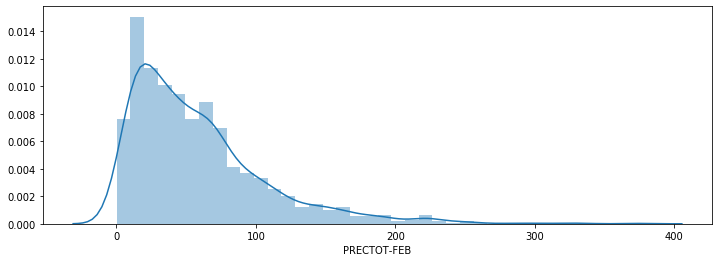

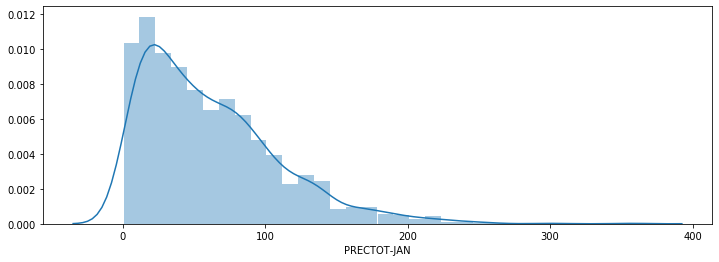

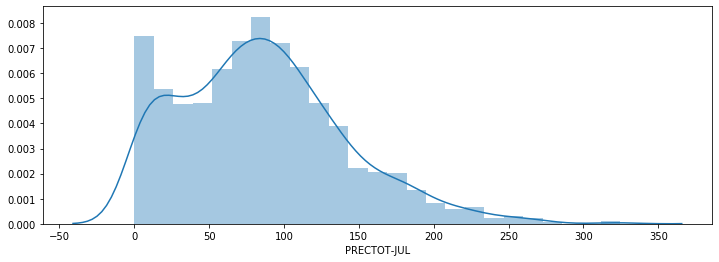

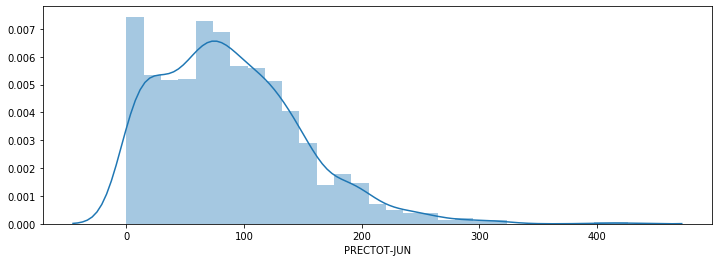

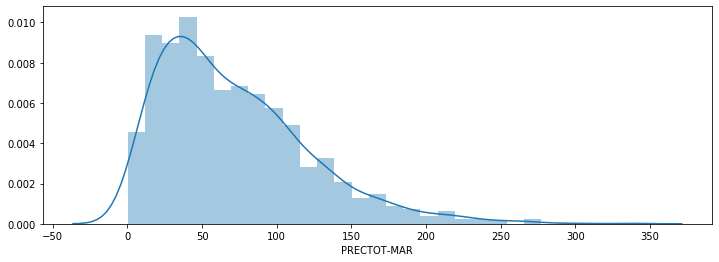

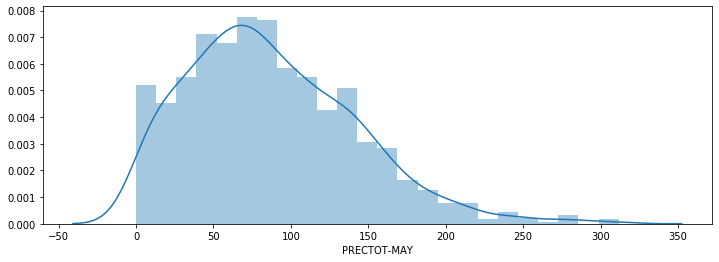

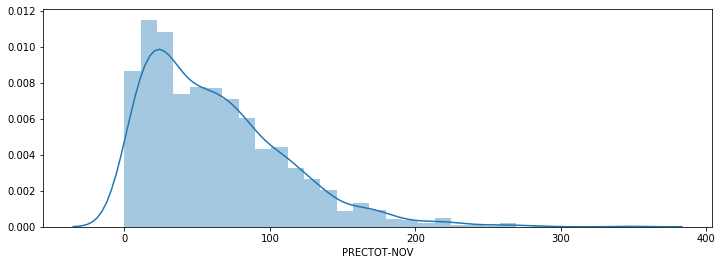

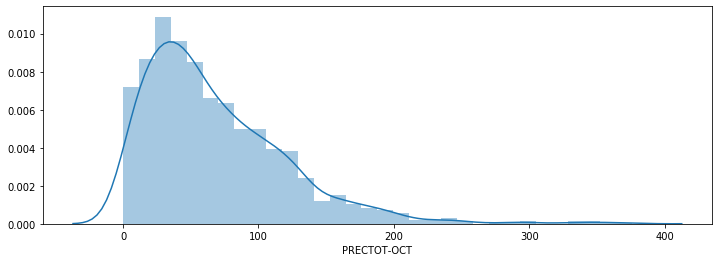

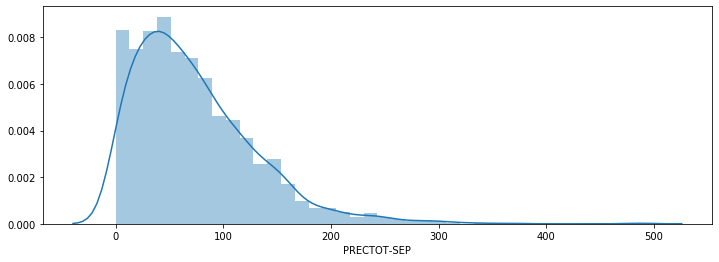

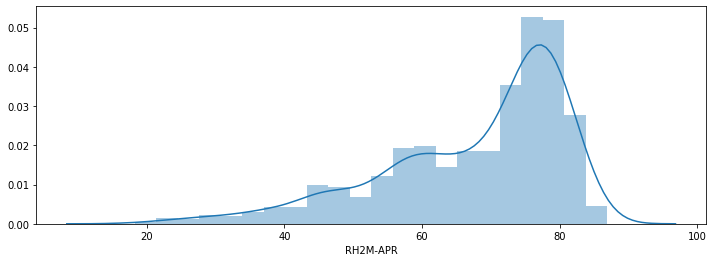

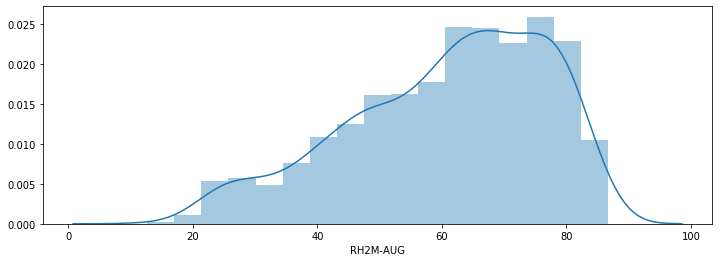

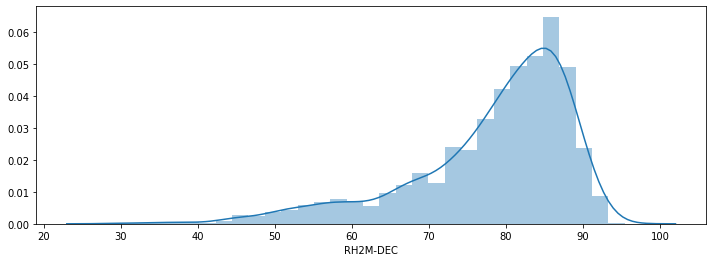

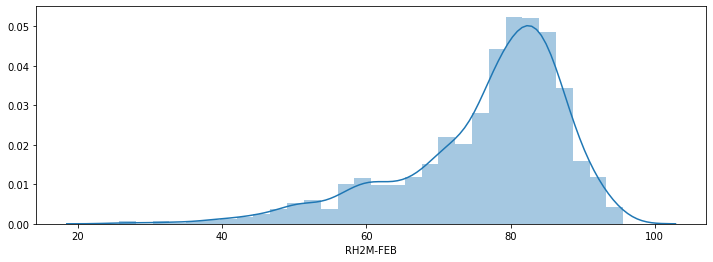

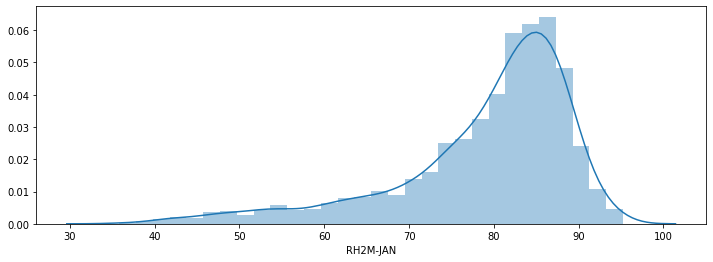

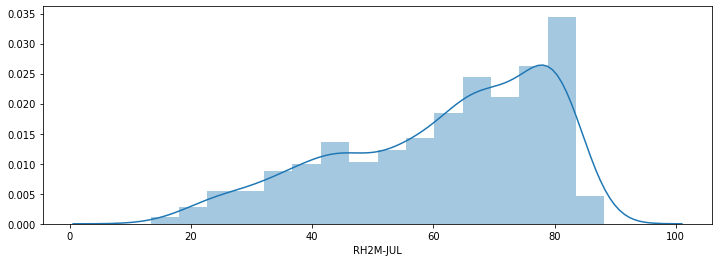

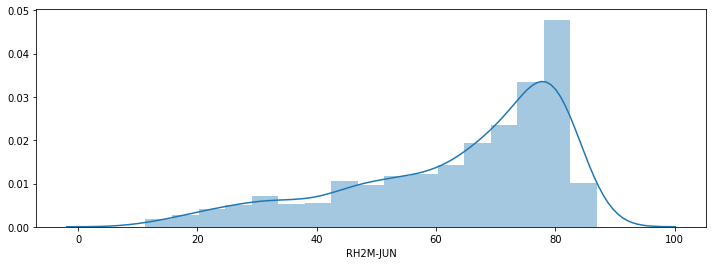

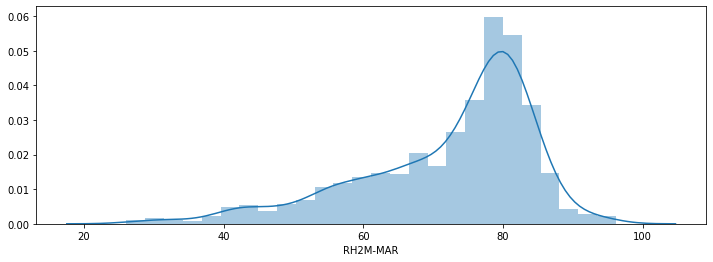

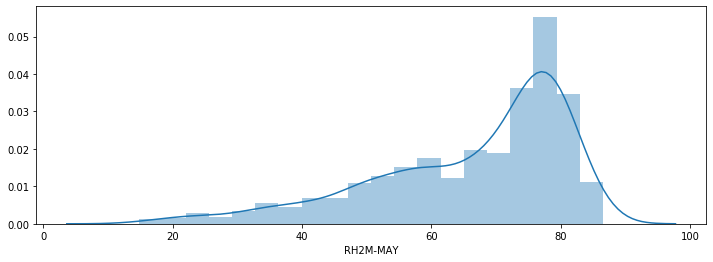

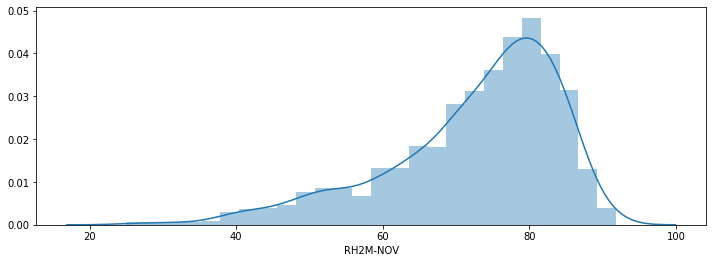

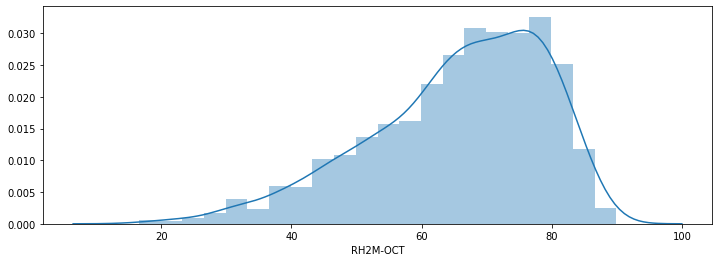

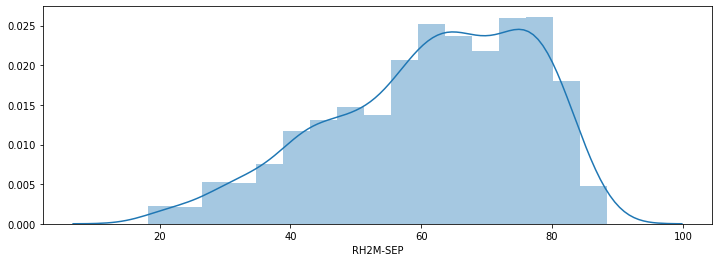

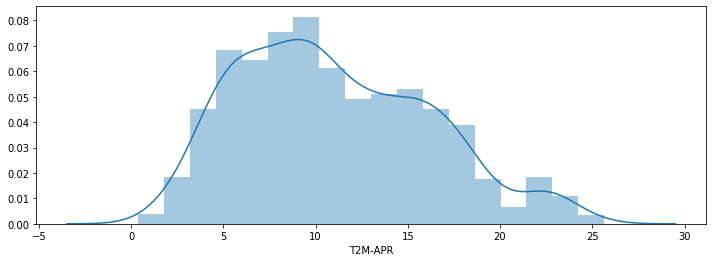

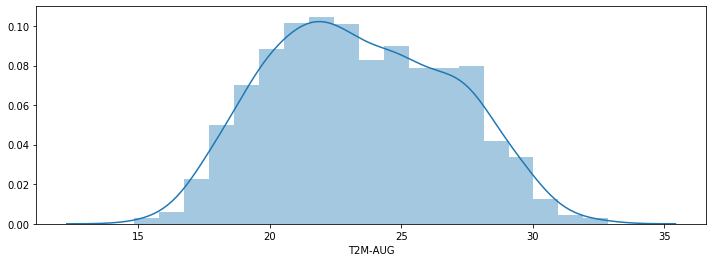

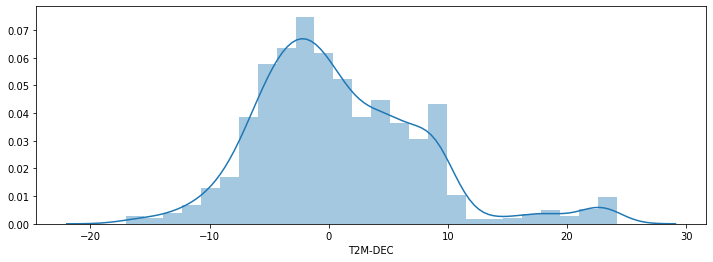

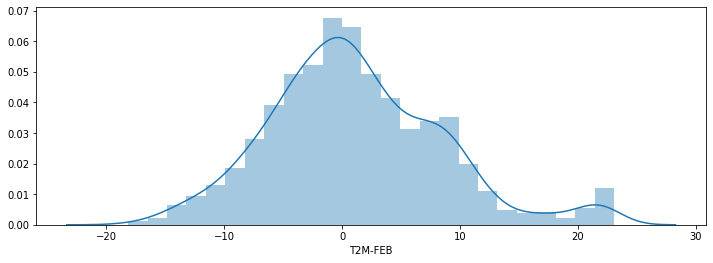

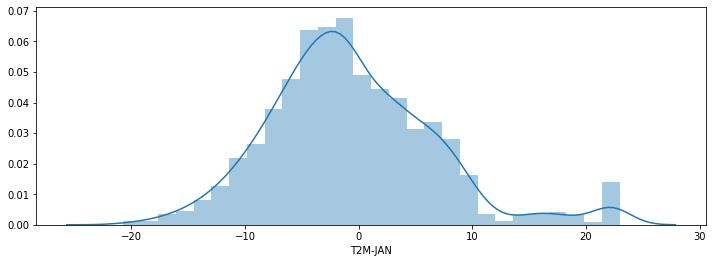

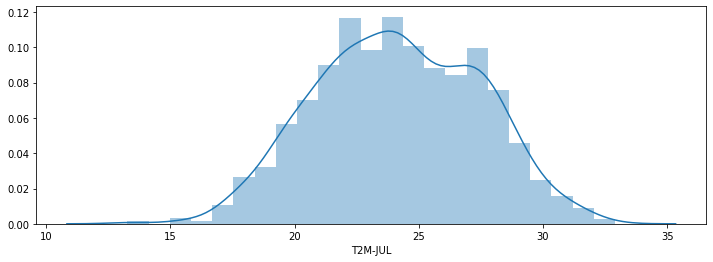

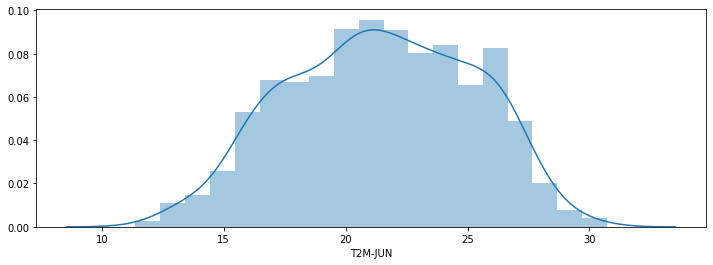

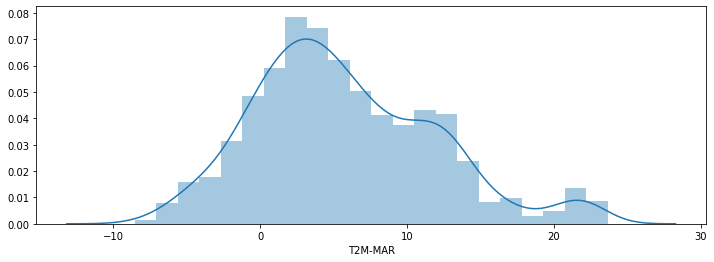

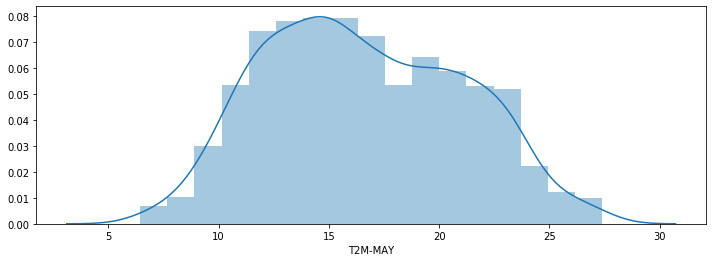

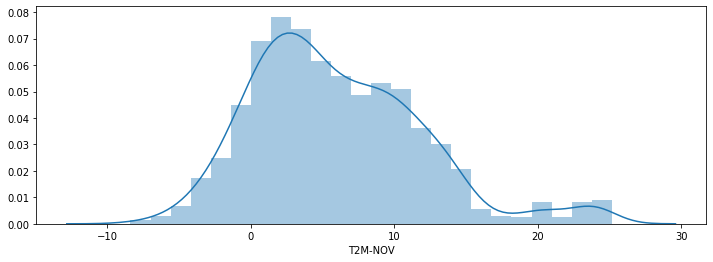

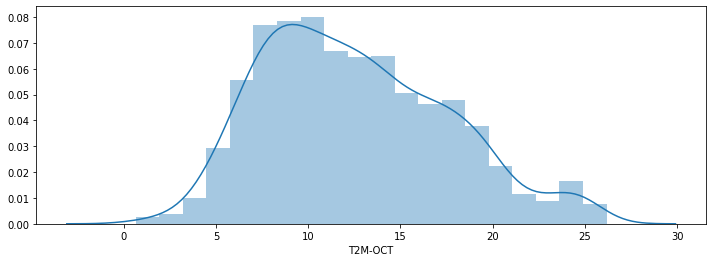

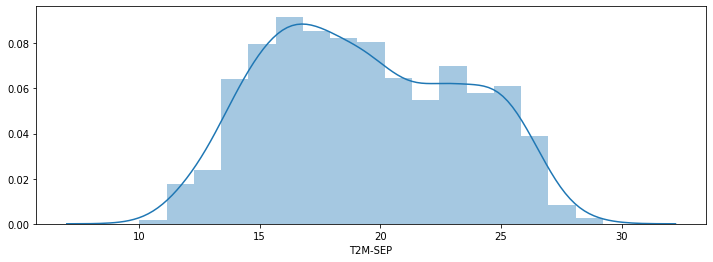

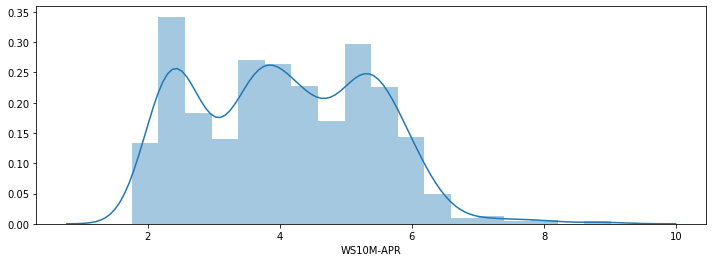

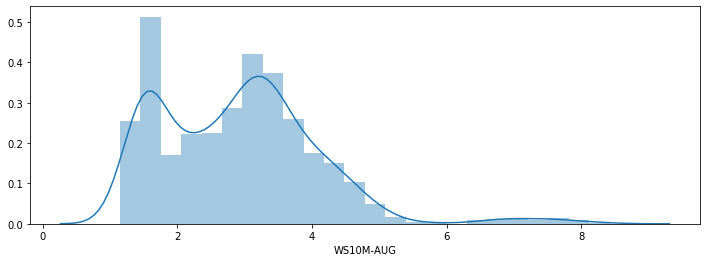

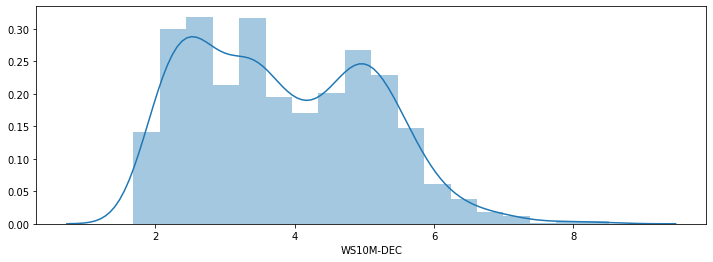

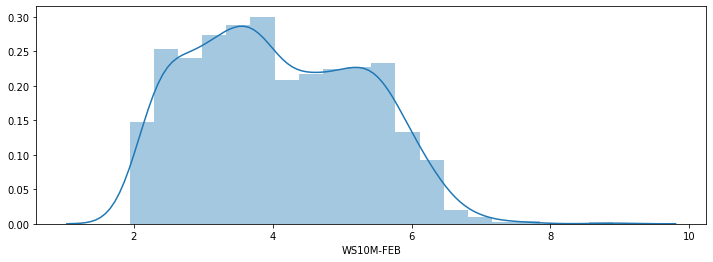

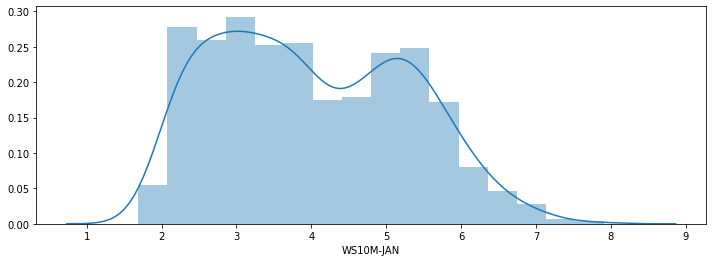

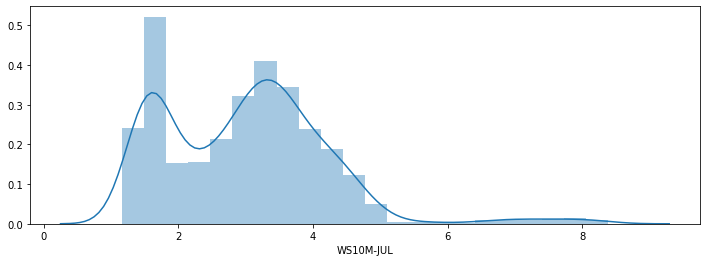

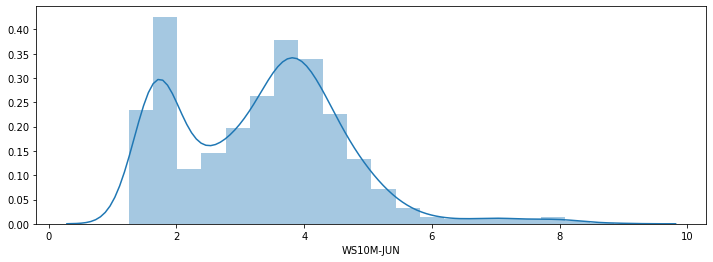

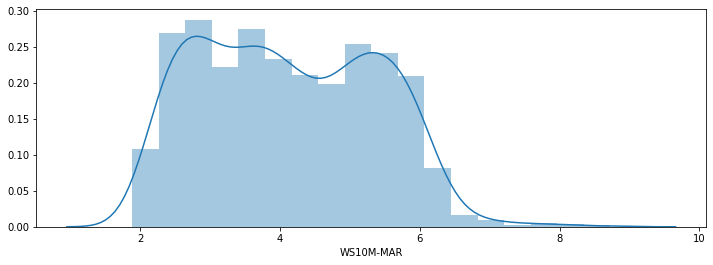

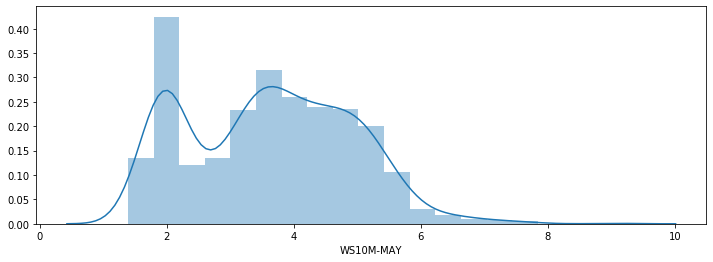

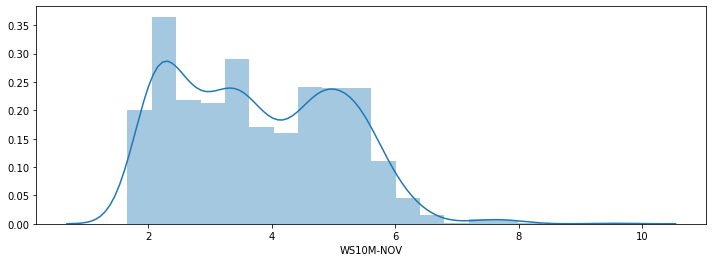

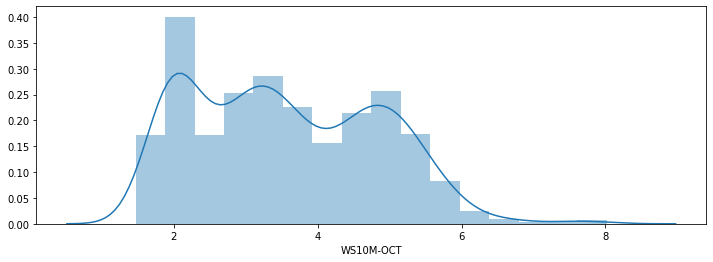

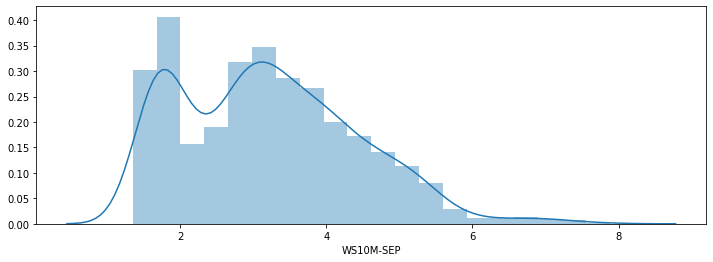

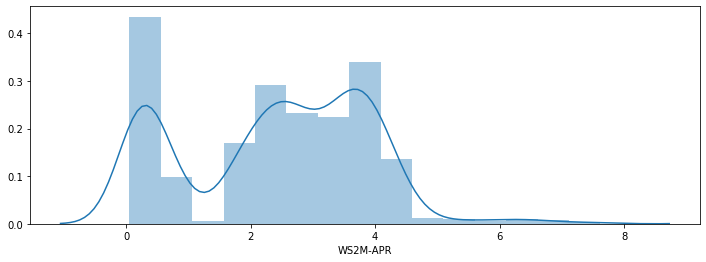

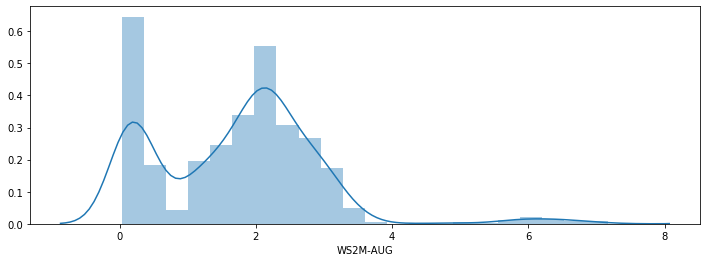

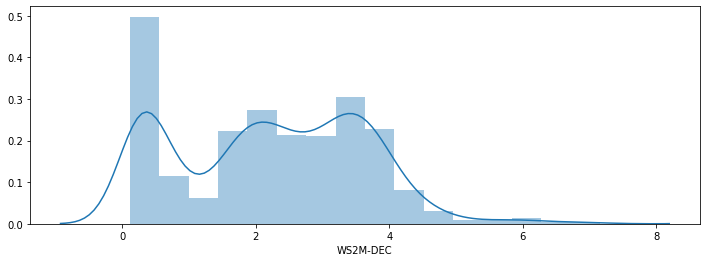

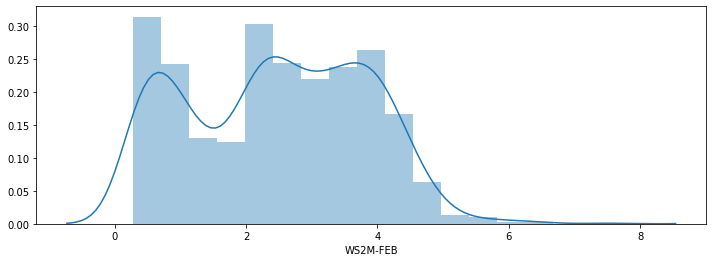

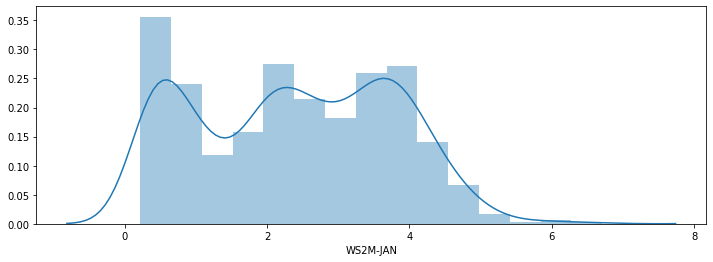

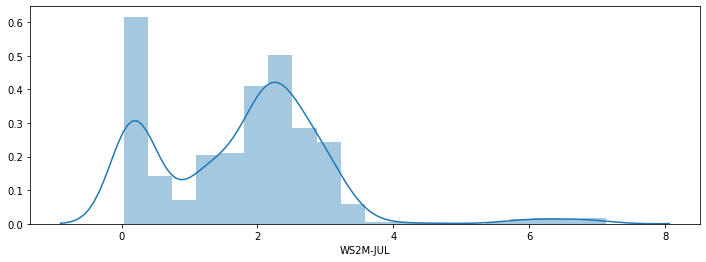

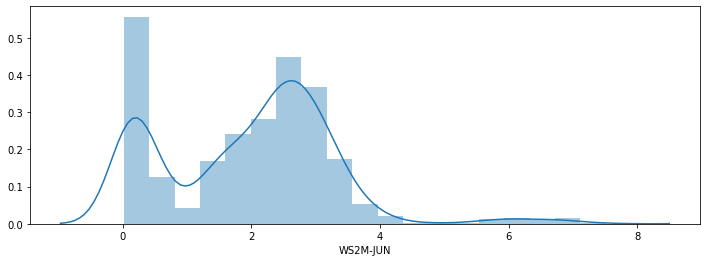

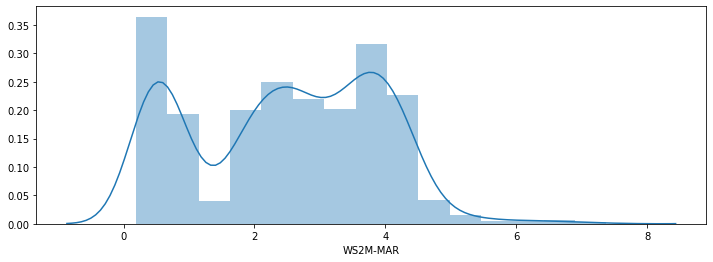

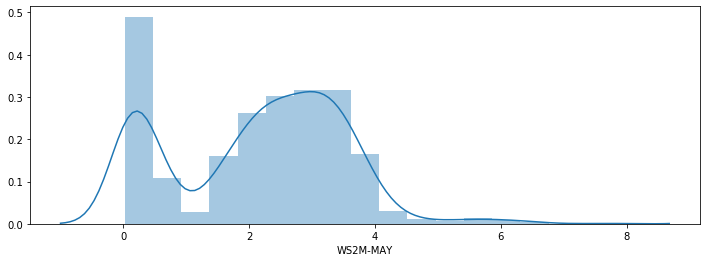

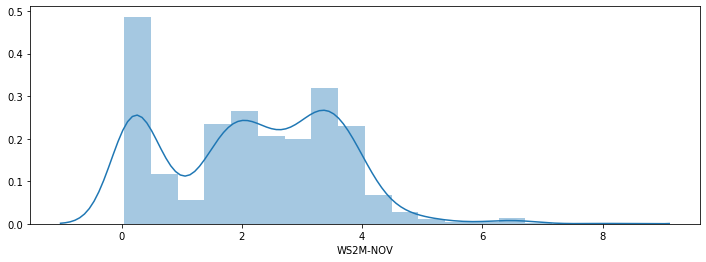

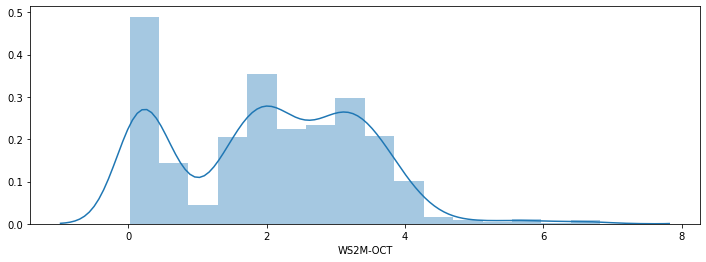

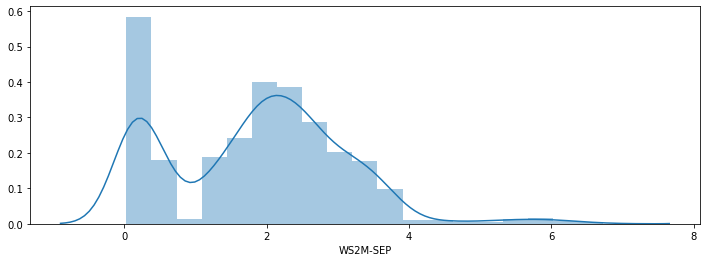

In [42]:
#EDA - Looking at the distribution of the features
for col in dtf_trs.columns.drop(['YEAR', 'STATE']):
    plt.figure(figsize=(12,4))
    sns.distplot(dtf_trs[col])

In [43]:
#for explainability
dtf_renamed = dtf.rename(columns={'WS10M':'Wind Speed at 10 meters (m/s)',
                                  'WS2M':'Wind Speed at 2 meters (m/s)',
                                  'T2M':'Temperature at 2 meters (Celcius)',
                                  'ALLSKY_SFC_SW_DWN':'All Sky Insolation incident on an horizontal surface (MJ/m2/day)',
                                  'RH2M':'Relative Humidity at 2 meters (%)',
                                  'ALLSKY_TOA_SW_DWN':'Top of Atmosphere insolation (MJ/m2?day)',
                                  'PRECTOT':'Precipitation (mm/day)'})

In [46]:
dft_yearly.columns

Index(['YEAR', 'STATE', 'NUMCOL', 'LBPERCOL', 'ALLSKY_SFC_SW_DWN',
       'ALLSKY_TOA_SW_DWN', 'PRECTOT', 'RH2M', 'T2M', 'WS10M', 'WS2M'],
      dtype='object', name='PARAMETER')

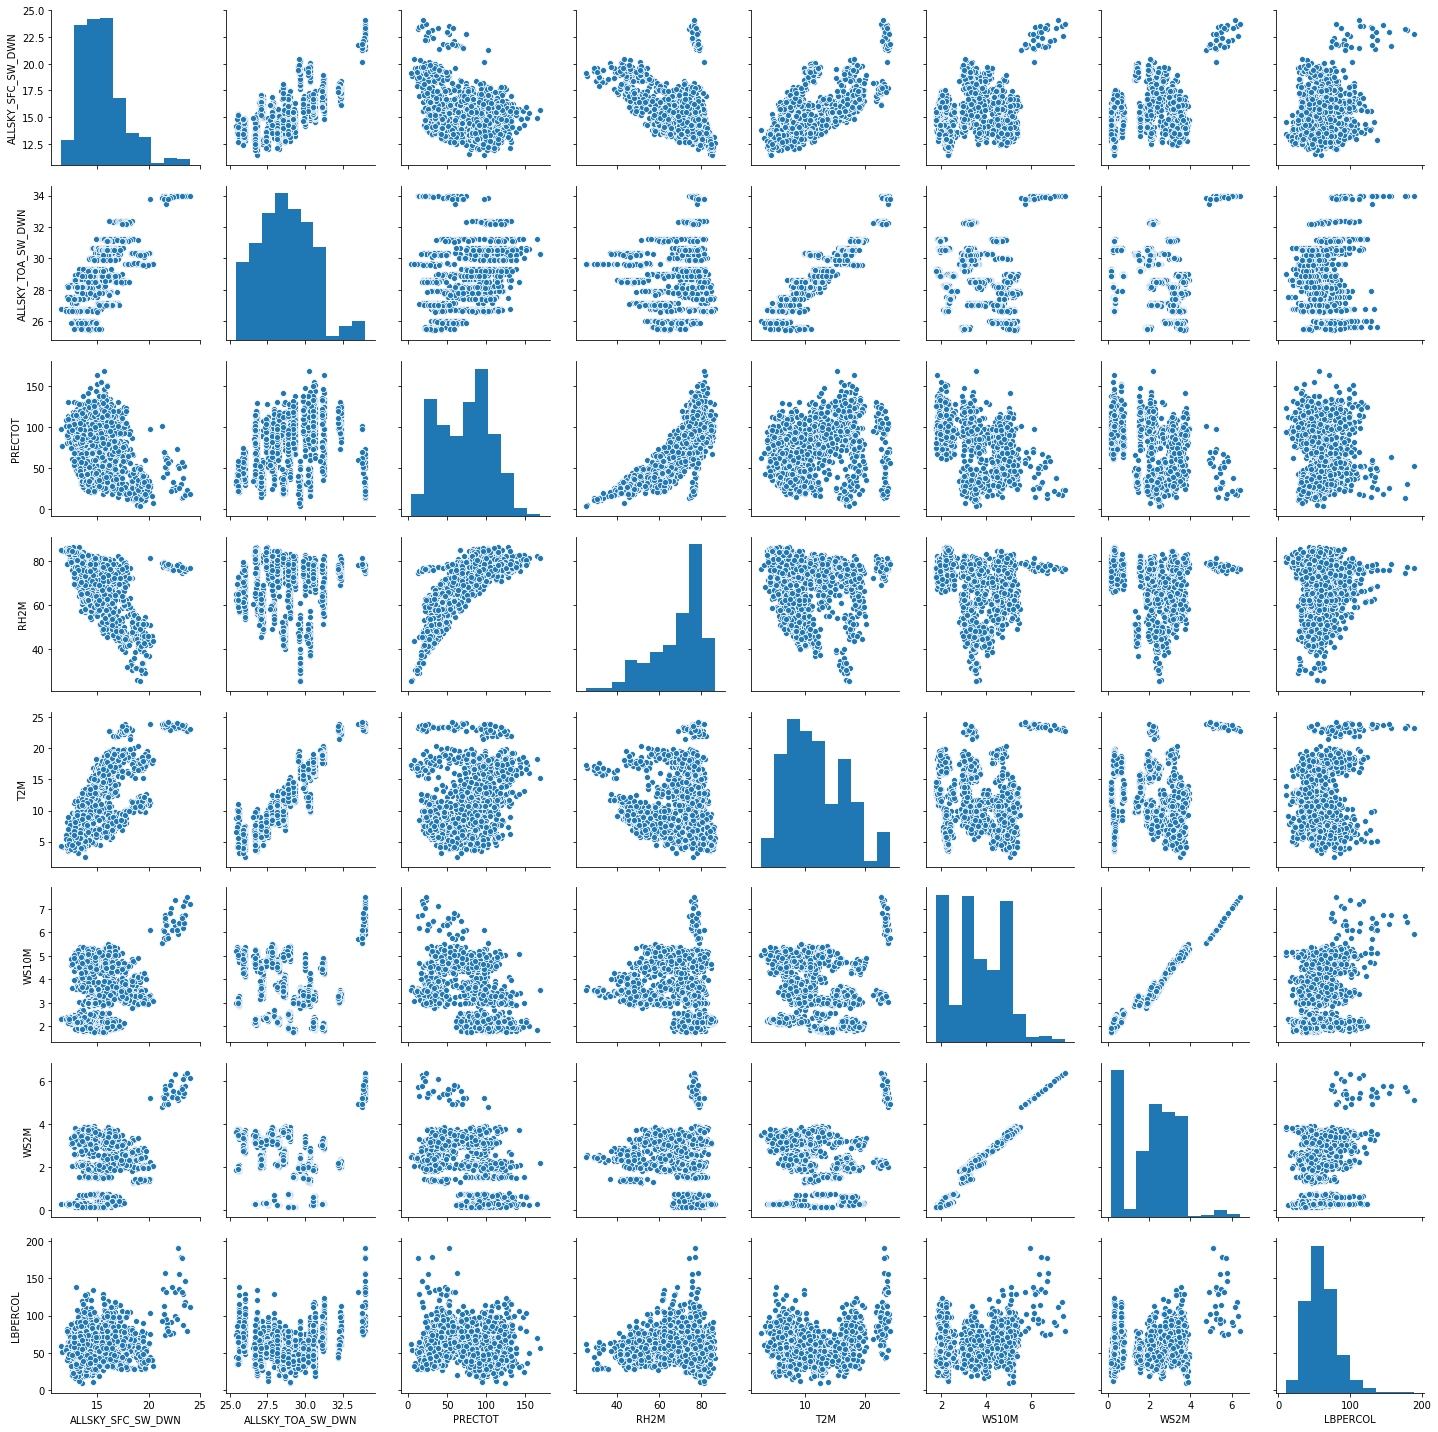

In [47]:
sns.pairplot(dft_yearly[['ALLSKY_SFC_SW_DWN', 'ALLSKY_TOA_SW_DWN',
       'PRECTOT', 'RH2M', 'T2M', 'WS10M', 'WS2M', 'LBPERCOL']])

/Users/spezzata/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


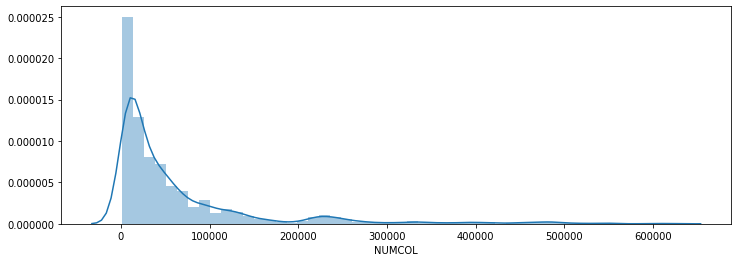

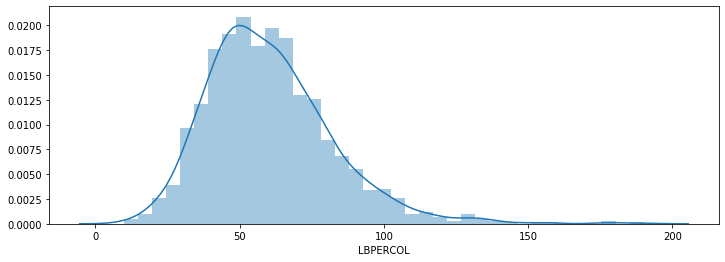

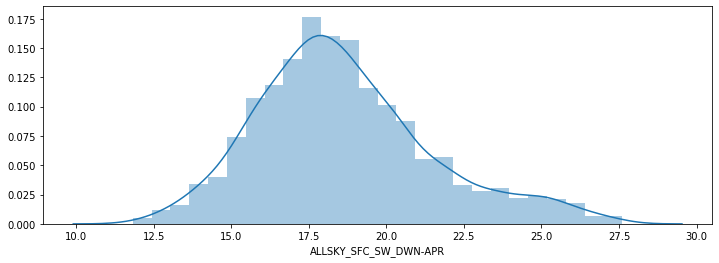

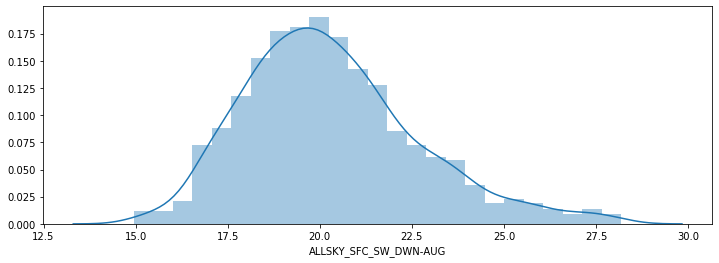

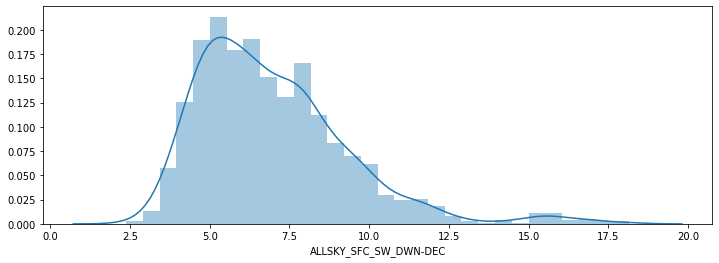

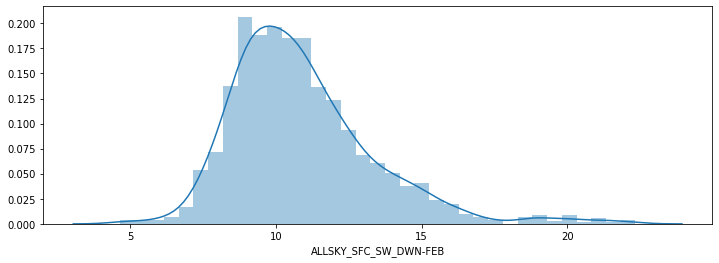

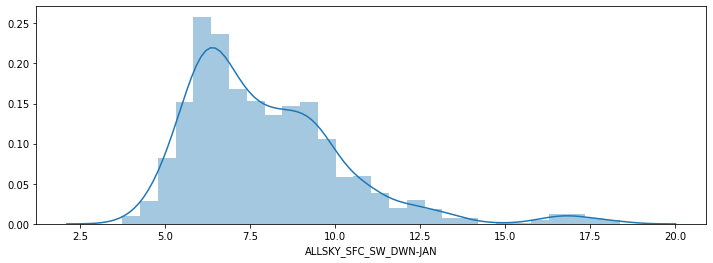

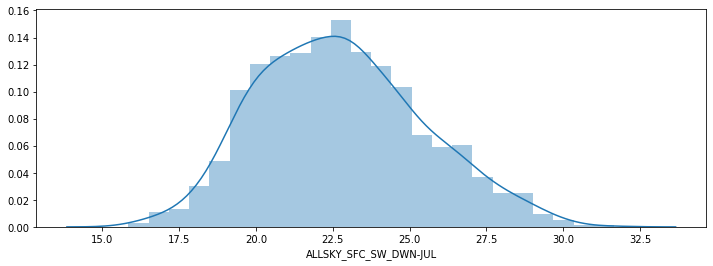

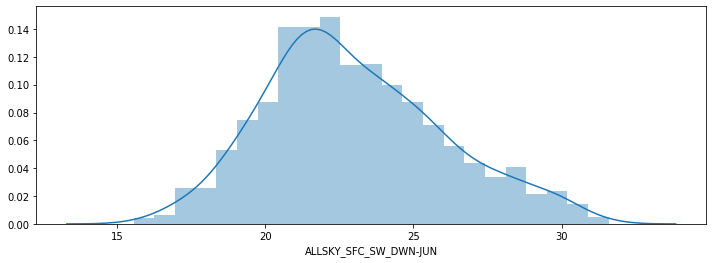

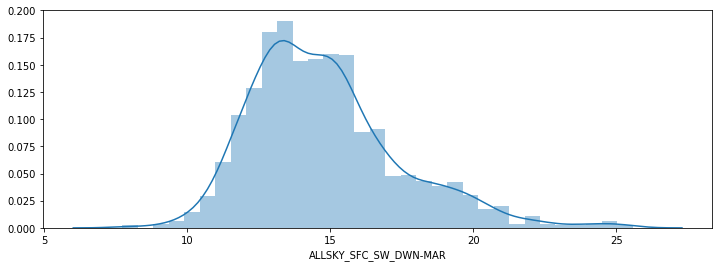

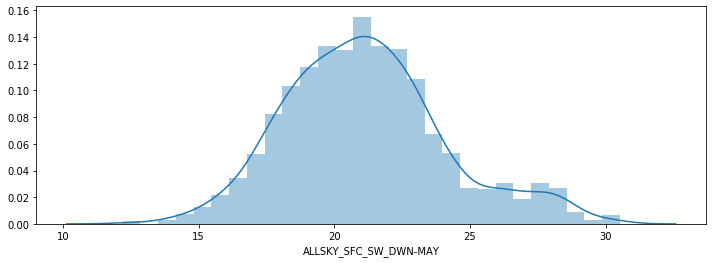

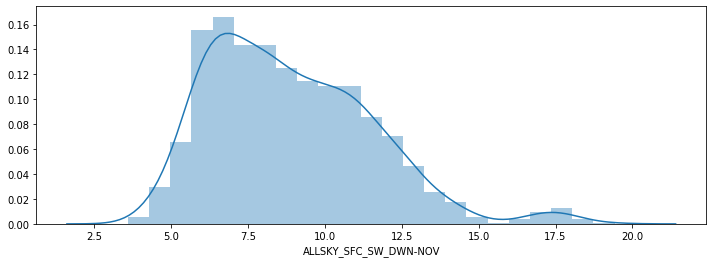

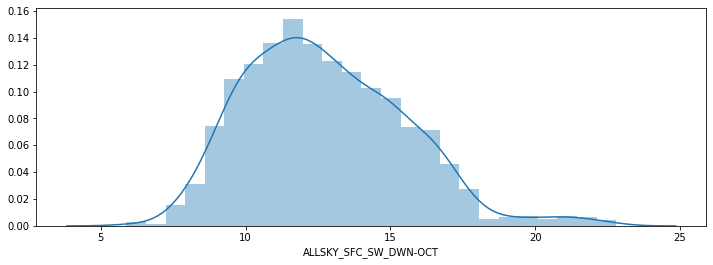

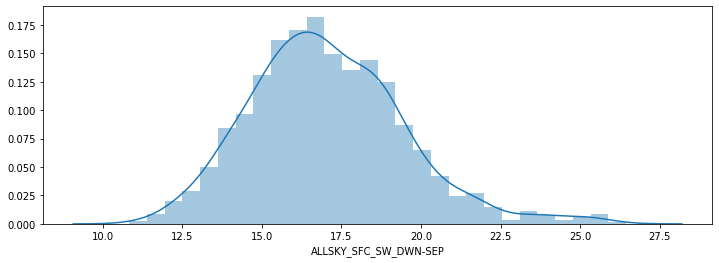

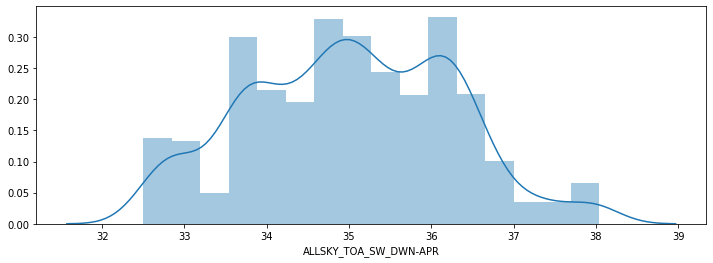

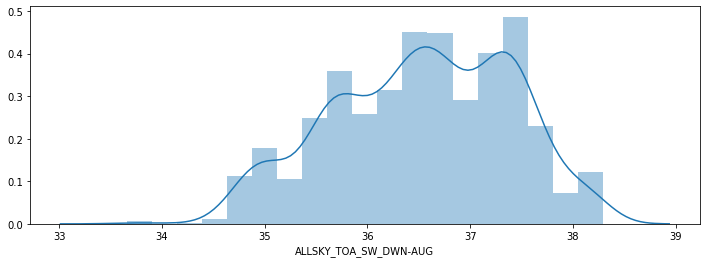

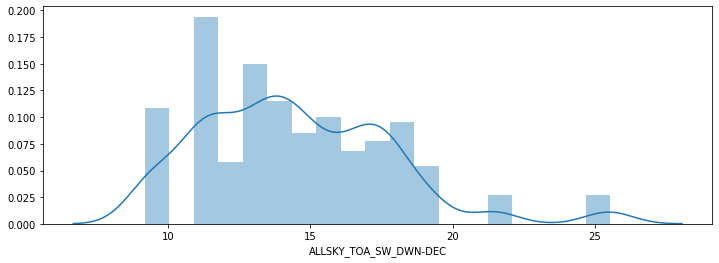

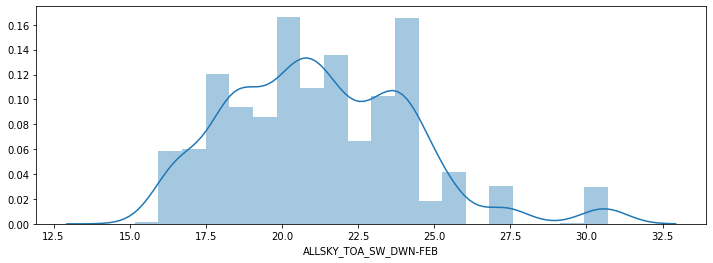

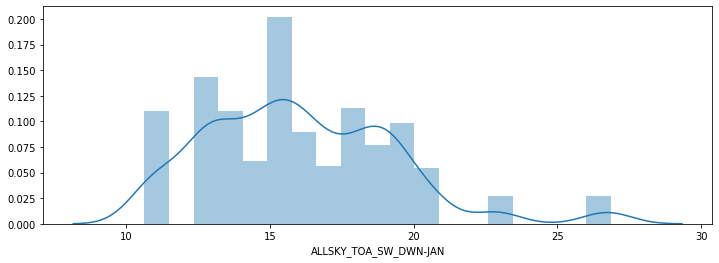

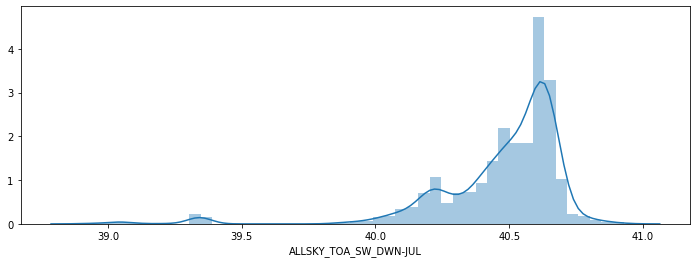

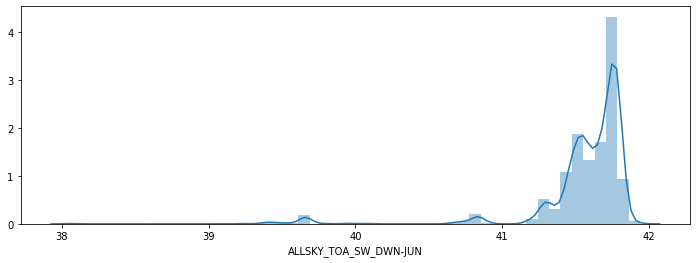

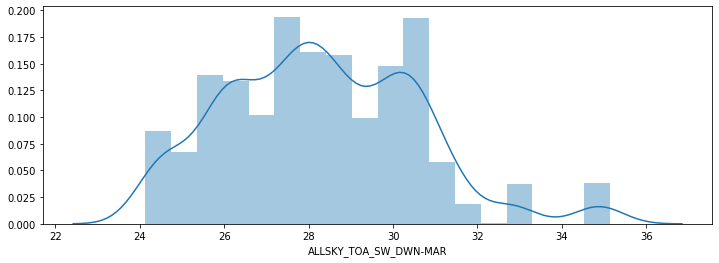

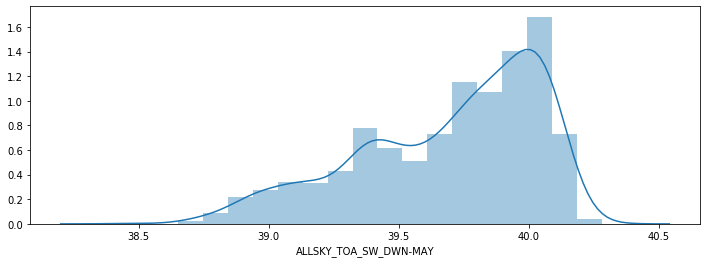

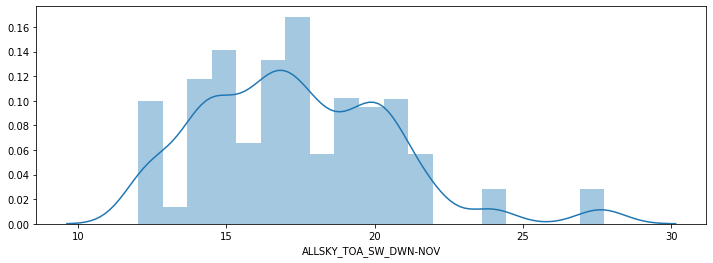

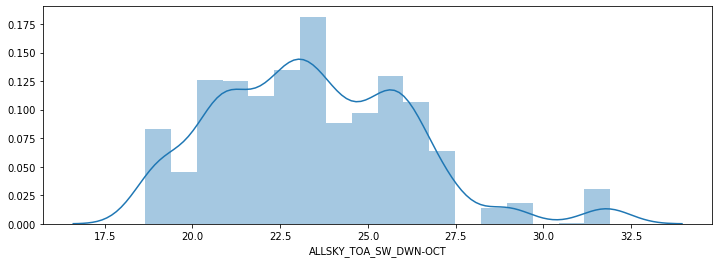

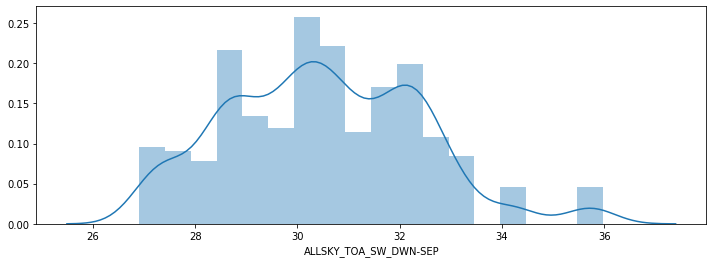

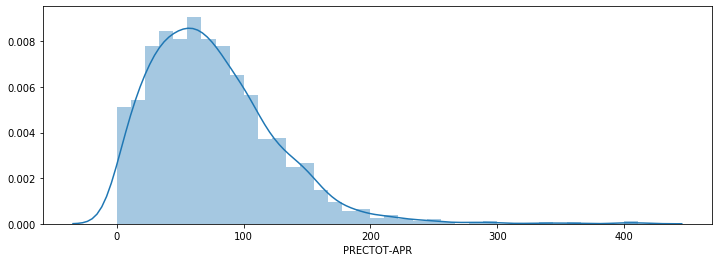

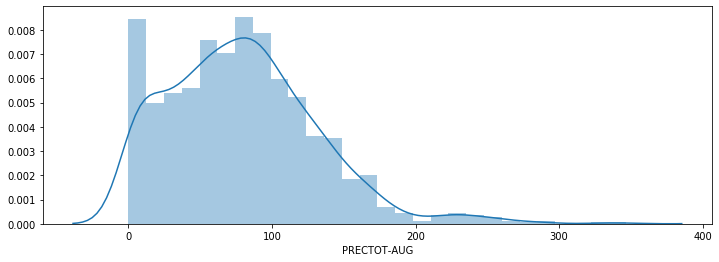

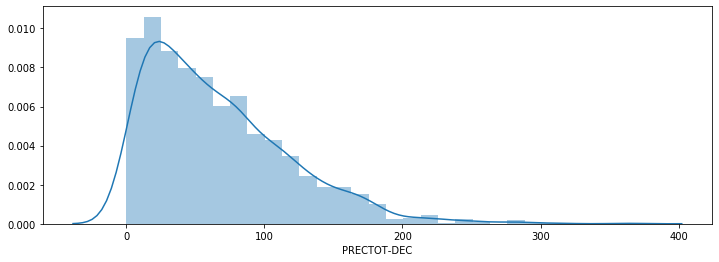

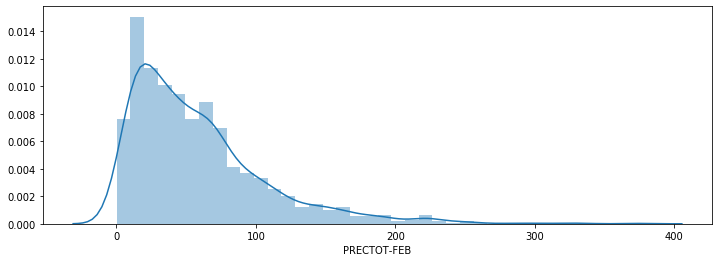

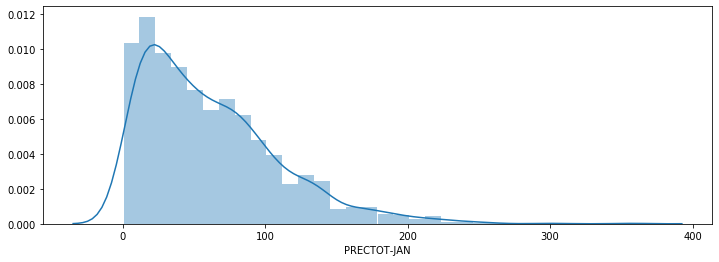

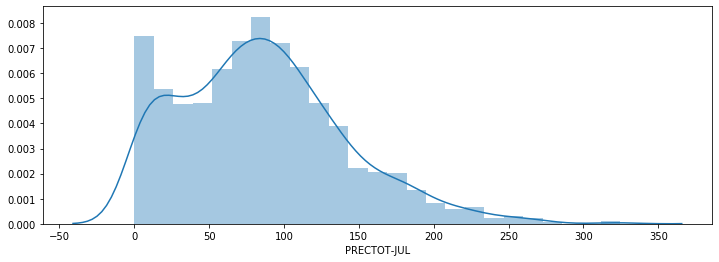

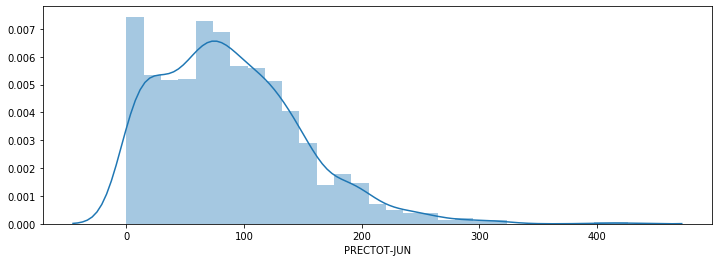

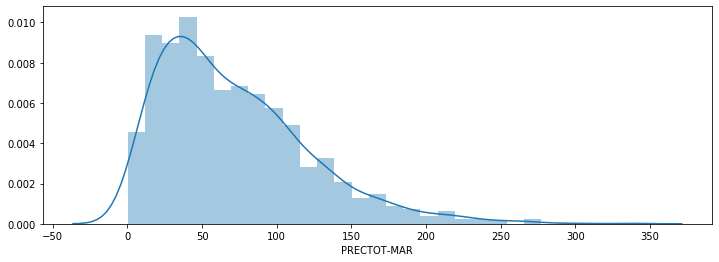

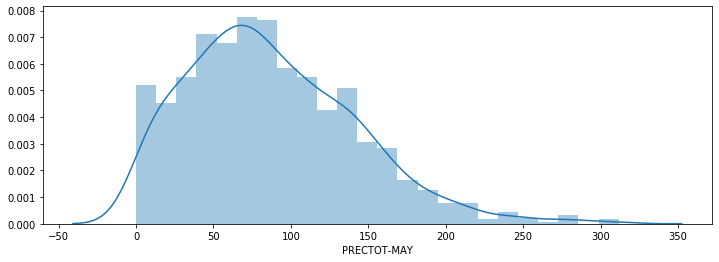

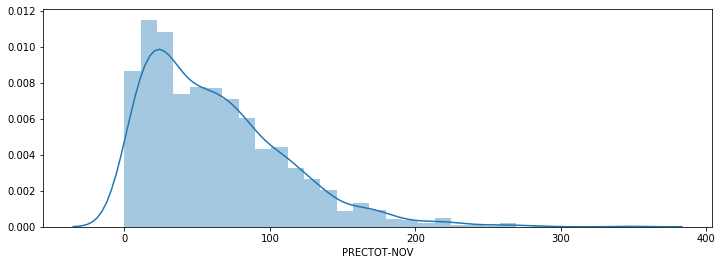

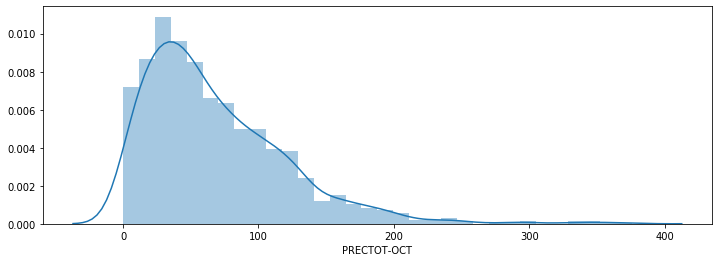

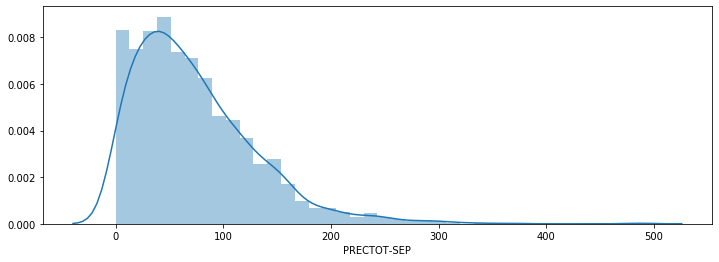

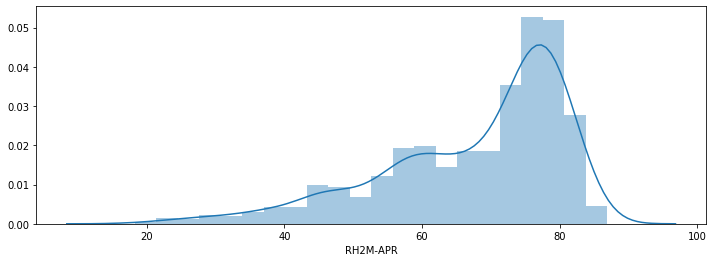

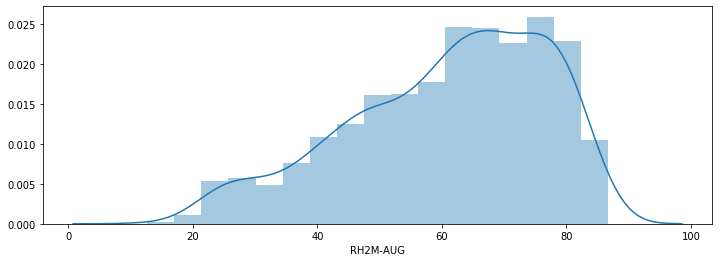

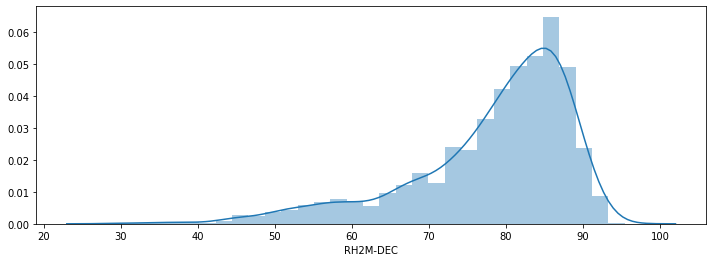

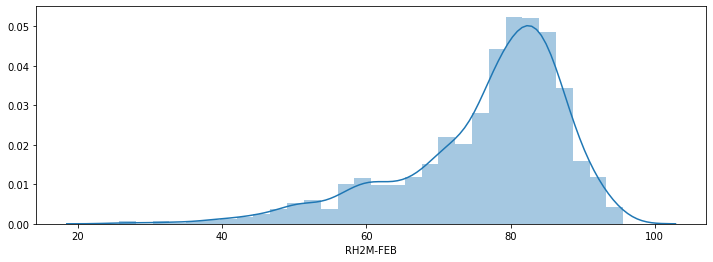

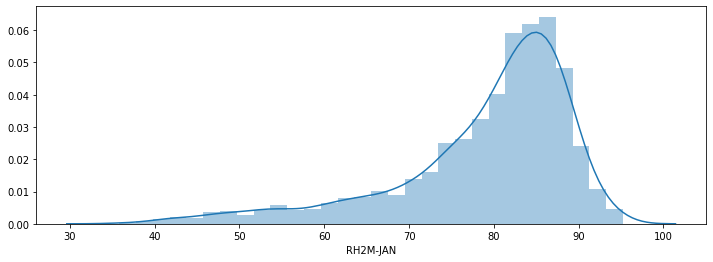

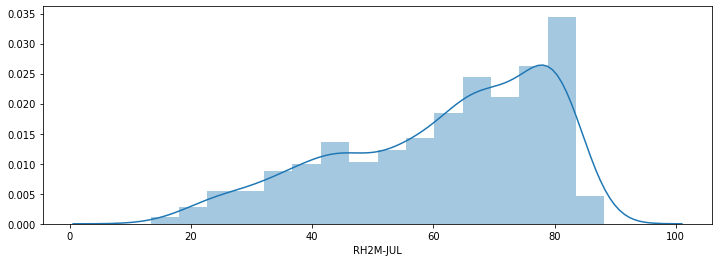

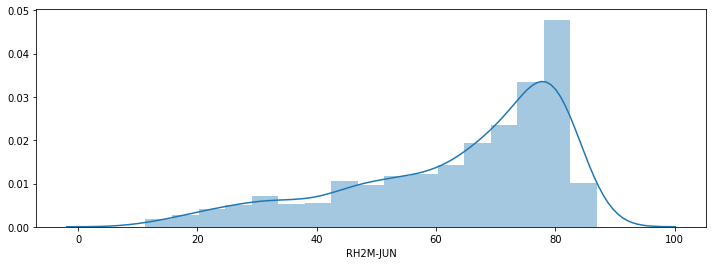

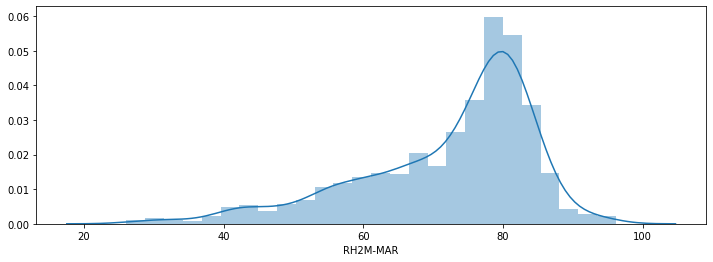

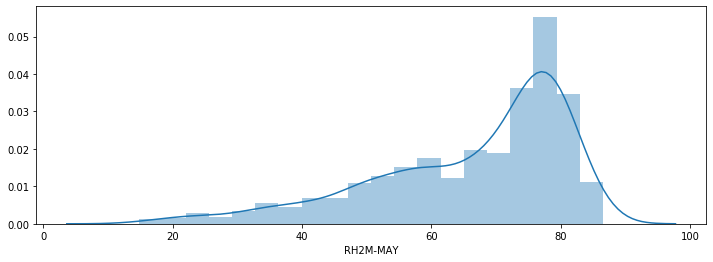

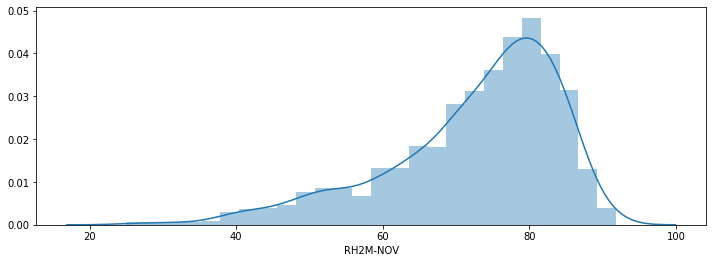

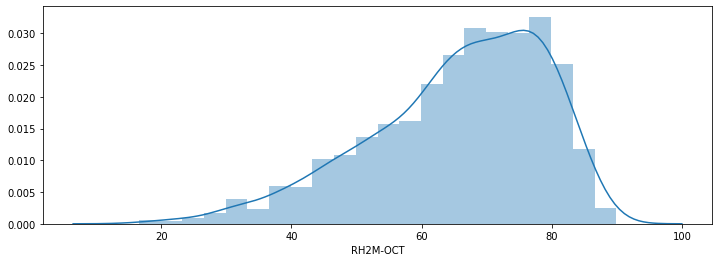

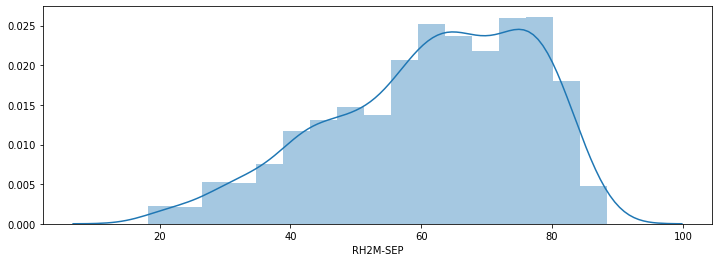

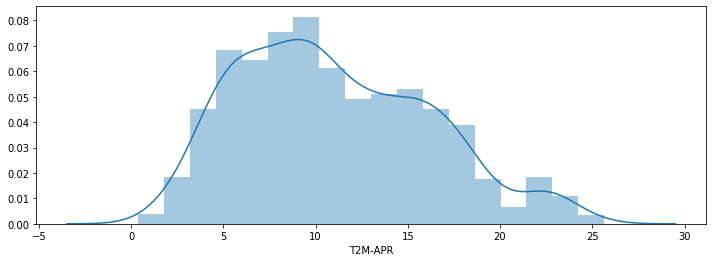

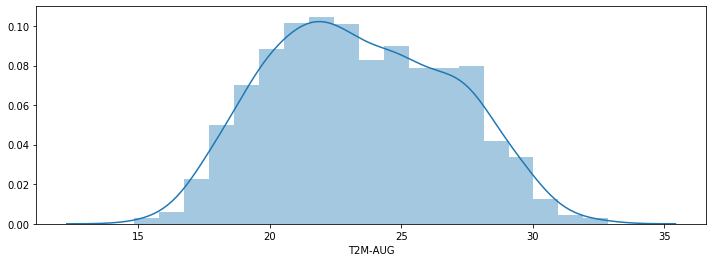

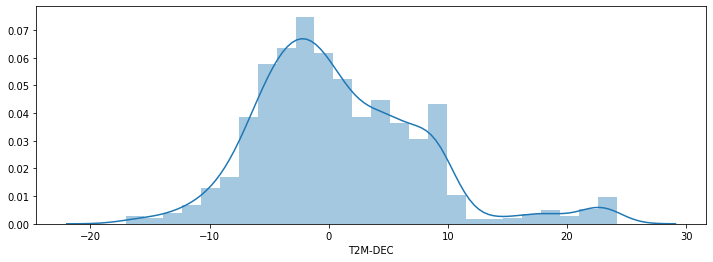

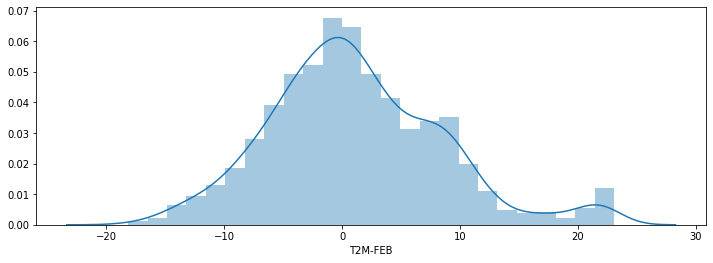

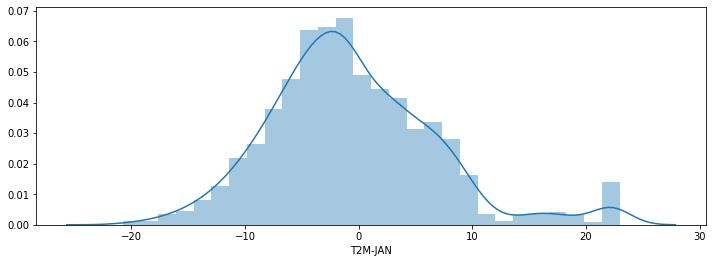

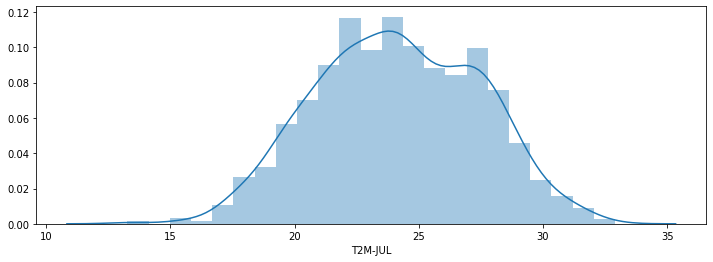

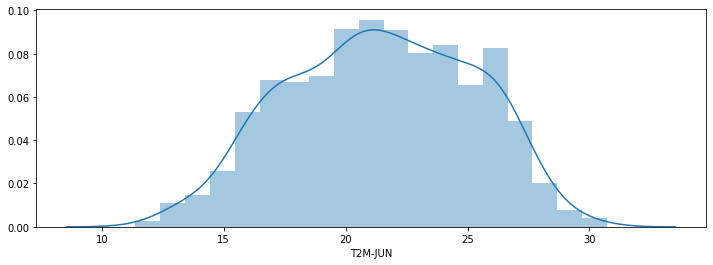

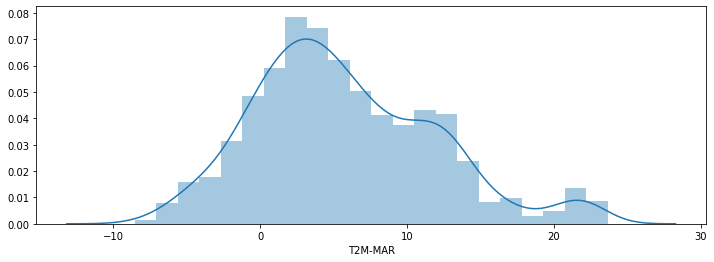

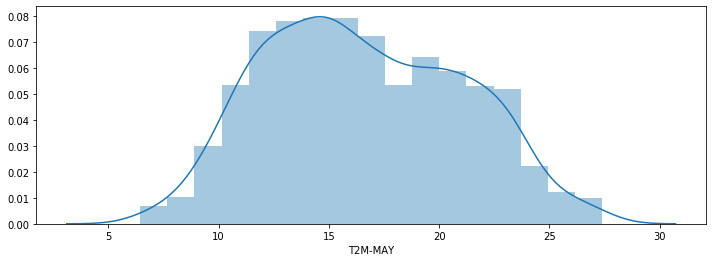

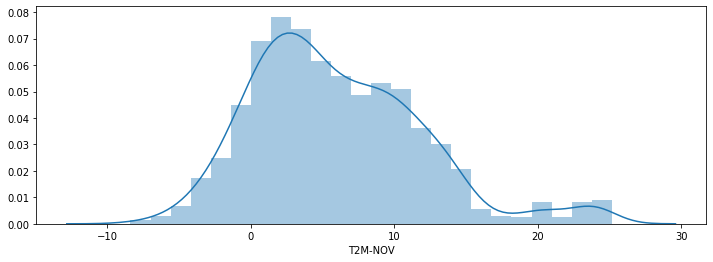

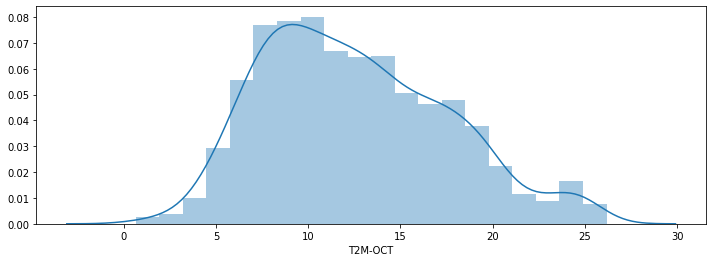

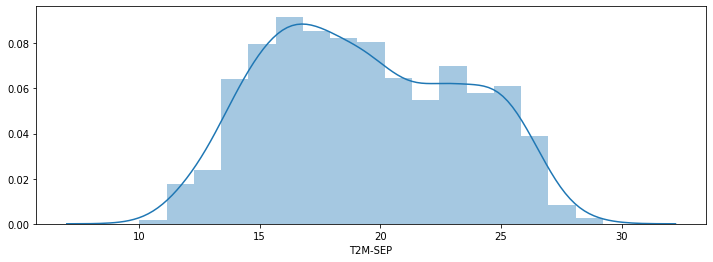

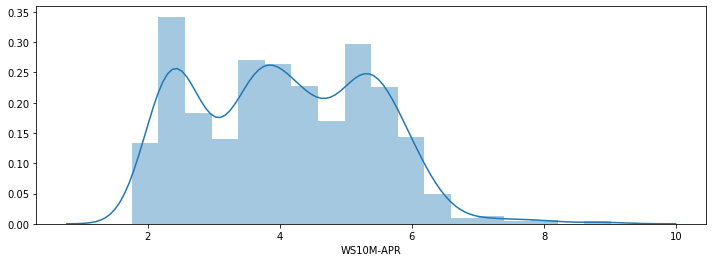

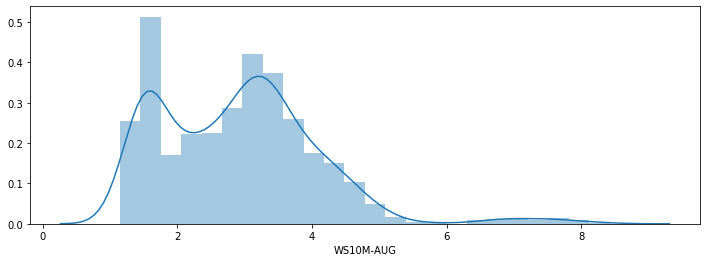

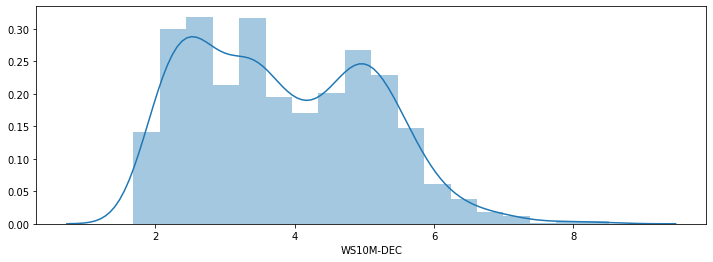

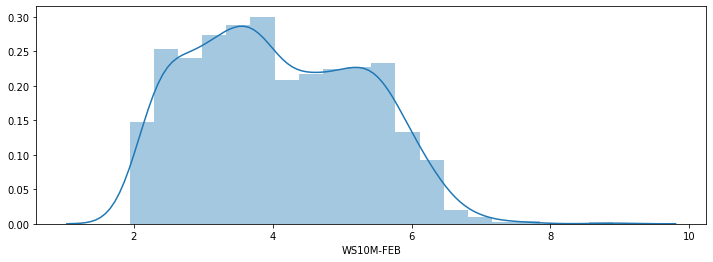

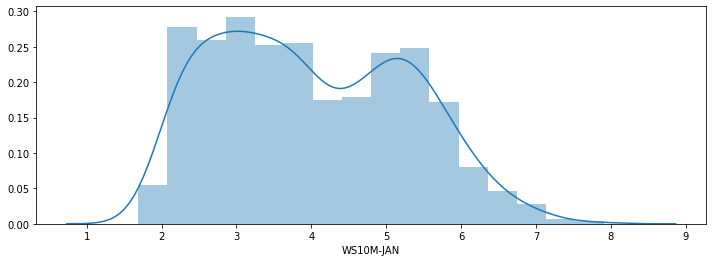

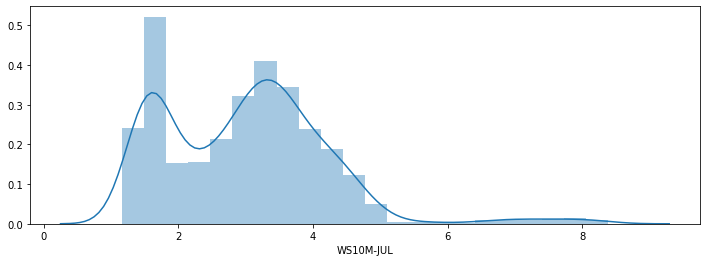

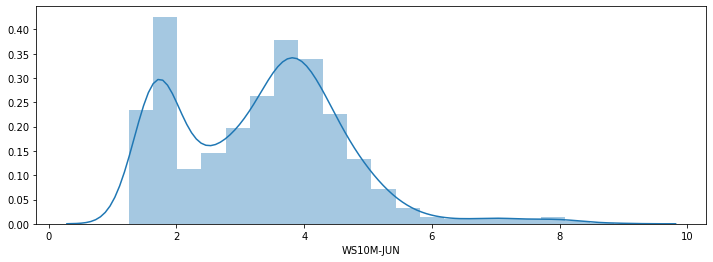

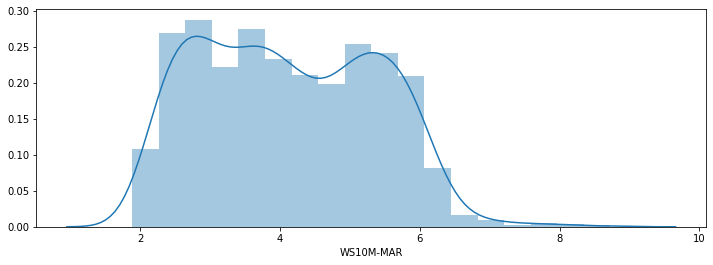

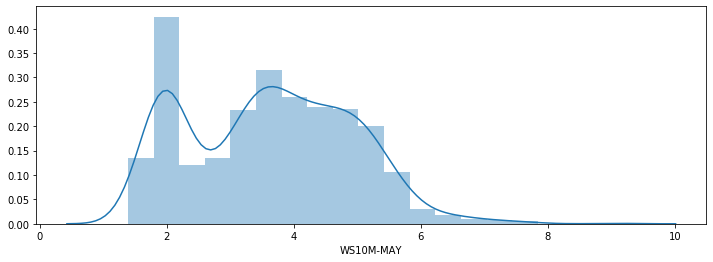

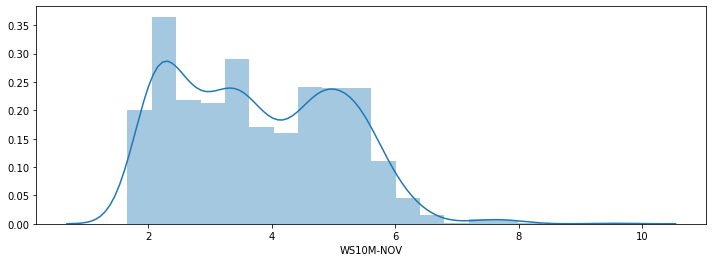

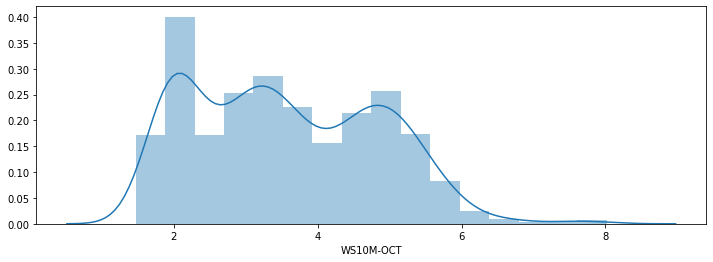

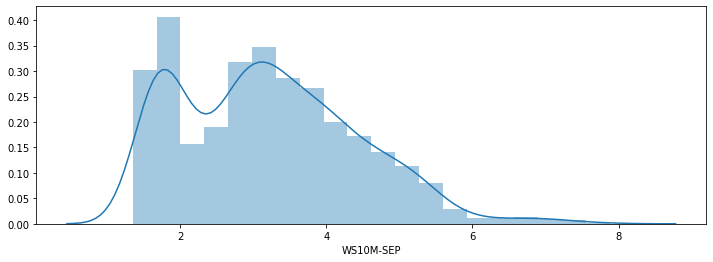

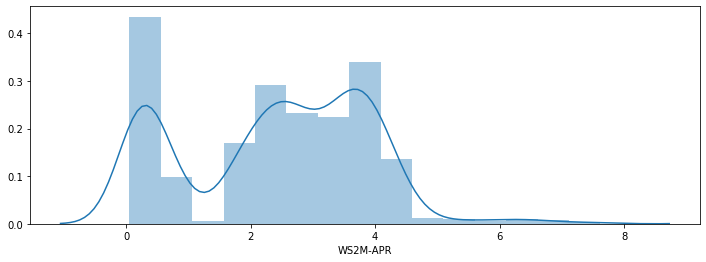

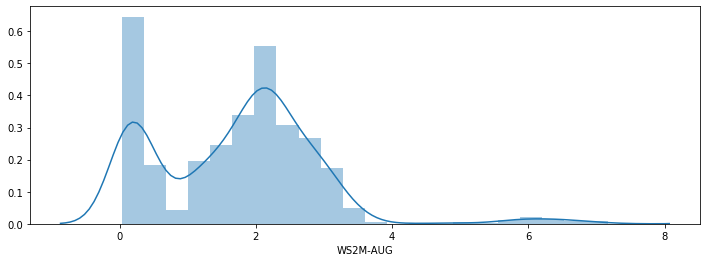

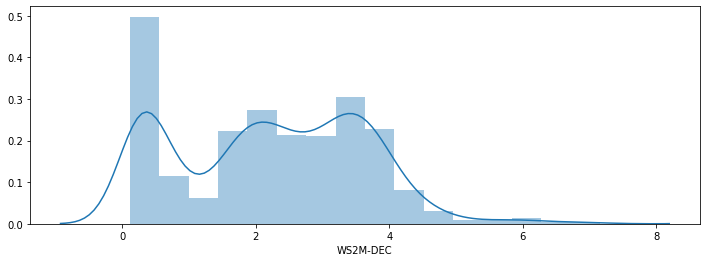

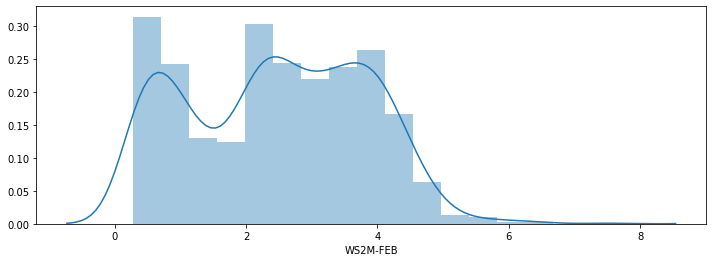

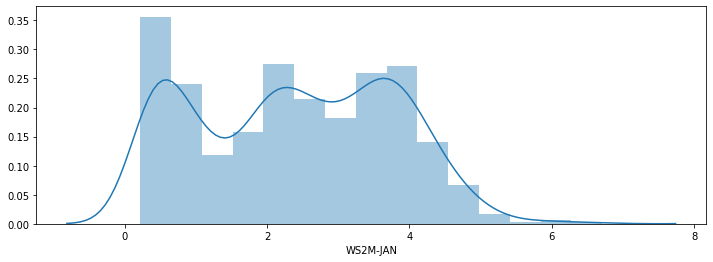

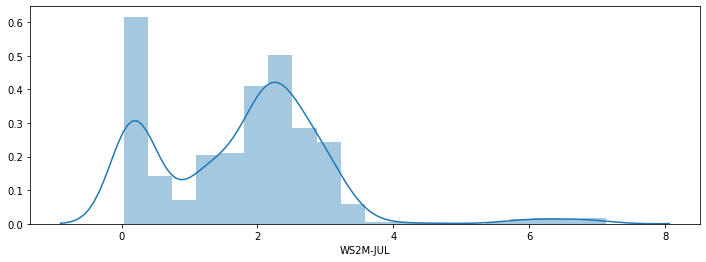

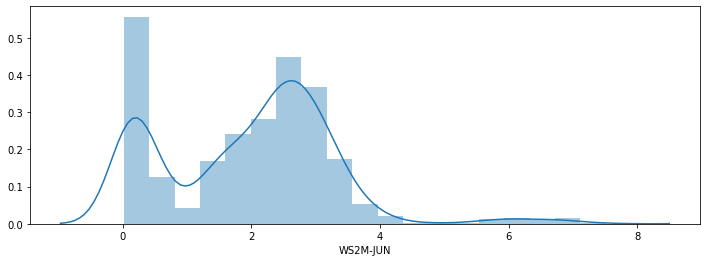

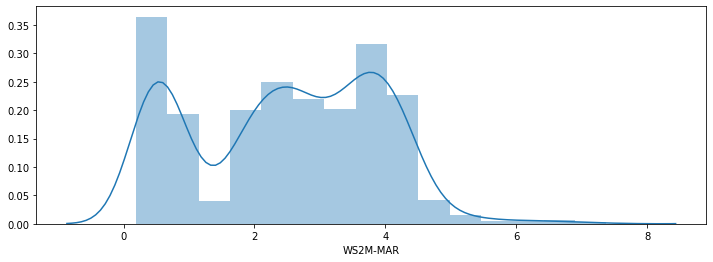

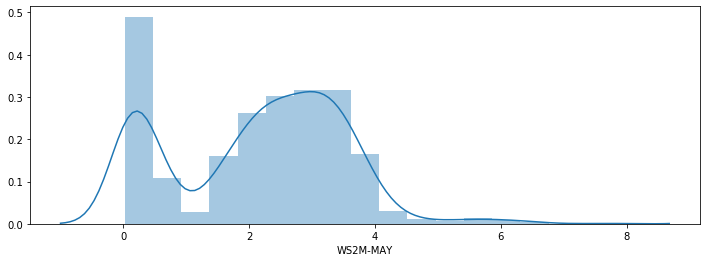

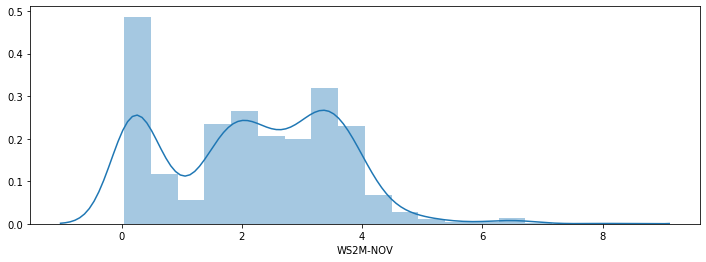

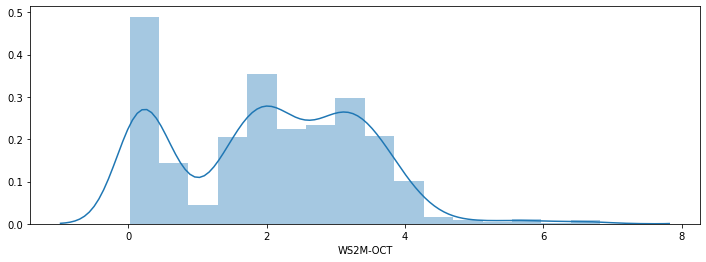

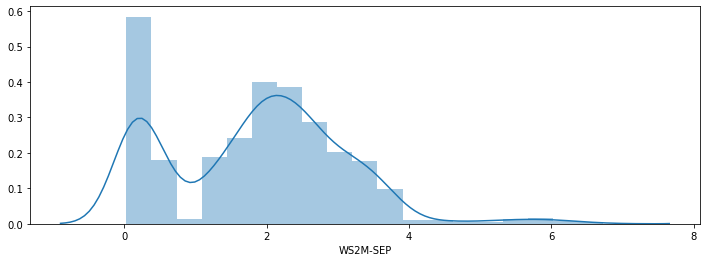

In [51]:
for col in dtf_trs.columns.drop(['YEAR', 'STATE']):
    plt.figure(figsize=(12,4))
    sns.distplot(dtf_trs[col])

# Splitting training and test set

We use all data before 2016 in the training set and the data fron 2016, 2017, 2018 and 2019 in the testset. This present around 89% for training and 11% for test.

In [54]:
len(dtf_trs[dtf_trs['YEAR'].isin([2016, 2017, 2018, 2019])])/len(dtf_trs)

0.11363636363636363

- Training set: all years before 2016: 89% of the dataset
- Test set: all years after 2016: 11% of the dataset

In [56]:
X_train = dtf_trs[~dtf_trs['YEAR'].isin([2016, 2017, 2018, 2019])][dtf_trs.columns.drop(['YEAR', 'STATE', 'LBPERCOL', 'NUMCOL'])]
y_train = dtf_trs[~dtf_trs['YEAR'].isin([2016, 2017, 2018, 2019])]['LBPERCOL']

X_test = dtf_trs[dtf_trs['YEAR'].isin([2016, 2017, 2018, 2019])][dtf_trs.columns.drop(['YEAR', 'STATE', 'LBPERCOL', 'NUMCOL'])]
y_test = dtf_trs[dtf_trs['YEAR'].isin([2016, 2017, 2018, 2019])]['LBPERCOL']

In [59]:
len(X_train)+len(X_test)==len(dtf_trs)

True

### Using Standard Scaler 

In [62]:
# set up the variable transformer
ss = StandardScalerDF()
# fit the transformer
ss.fit(X_train)
# transform the data
train_t= ss.transform(X_train)
test_t= ss.transform(X_test)

In [63]:
X = train_t.values
y = y_train.values.ravel()

In [64]:
#random forest
RF_model = RandomForestRegressor(max_depth=5, random_state=42, n_jobs=-3).fit(train_t, y_train)

### Looking at SHAP values to evaluate the influence of each predictors on the output

In [65]:
explainer = shap.TreeExplainer(RF_model)
shap_values = explainer.shap_values(train_t)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


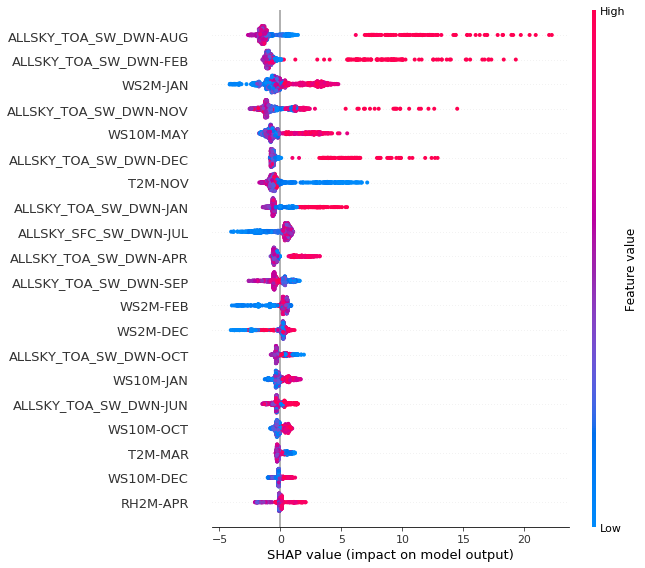

In [66]:
shap.summary_plot(shap_values, train_t)

### Using Boruta to only use relevant features

In [68]:
model_rf = RandomForestRegressor(max_depth=5, random_state=42, n_jobs=-3).fit(train_t, y_train)

In [69]:
feature_selector = BorutaPy(model_rf, n_estimators='auto', verbose=2, random_state=1)
feature_selector.fit(train_t.values, y_train.values.ravel())

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	84
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	84
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	84
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	84
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	84
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	84
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	84
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	33
Tentative: 	28
Rejected: 	23
Iteration: 	9 / 100
Confirmed: 	33
Tentative: 	28
Rejected: 	23
Iteration: 	10 / 100
Confirmed: 	33
Tentative: 	28
Rejected: 	23
Iteration: 	11 / 100
Confirmed: 	33
Tentative: 	28
Rejected: 	23
Iteration: 	12 / 100
Confirmed: 	33
Tentative: 	28
Rejected: 	23
Iteration: 	13 / 100
Confirmed: 	33
Tentative: 	28
Rejected: 	23
Iteration: 	14 / 100
Confirmed: 	33
Tentative: 	28
Rejected: 	23
Iteration: 	15 / 100
Confirmed: 	33
Tentative: 	27
Rejected: 	24
Iteration: 	16 / 100
Confirmed: 	34
Tentative: 	

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=200,
                                         n_jobs=-3,
                                         random_state=RandomState(MT19937) at 0x15EDC7C00),
         n_estimators='auto', random_state=RandomState(MT19937) at 0x15EDC7C00,
         verbose=2)

In [70]:
#list of selected festures
features = train_t.columns
final_features = list()
indexes = np.where(feature_selector.support_ == True)
for x in np.nditer(indexes):
    final_features.append(features[x])
for feat in final_features:
    print(feat)

ALLSKY_SFC_SW_DWN-APR
ALLSKY_SFC_SW_DWN-AUG
ALLSKY_SFC_SW_DWN-FEB
ALLSKY_SFC_SW_DWN-JAN
ALLSKY_SFC_SW_DWN-JUL
ALLSKY_SFC_SW_DWN-MAR
ALLSKY_SFC_SW_DWN-MAY
ALLSKY_SFC_SW_DWN-SEP
ALLSKY_TOA_SW_DWN-APR
ALLSKY_TOA_SW_DWN-AUG
ALLSKY_TOA_SW_DWN-DEC
ALLSKY_TOA_SW_DWN-FEB
ALLSKY_TOA_SW_DWN-JAN
ALLSKY_TOA_SW_DWN-JUN
ALLSKY_TOA_SW_DWN-MAR
ALLSKY_TOA_SW_DWN-NOV
ALLSKY_TOA_SW_DWN-OCT
ALLSKY_TOA_SW_DWN-SEP
RH2M-APR
RH2M-FEB
RH2M-JAN
RH2M-MAR
RH2M-MAY
RH2M-SEP
T2M-FEB
T2M-JAN
T2M-JUL
T2M-MAR
T2M-MAY
T2M-NOV
T2M-OCT
T2M-SEP
WS10M-AUG
WS10M-DEC
WS10M-JAN
WS10M-MAY
WS10M-OCT
WS10M-SEP
WS2M-AUG
WS2M-DEC
WS2M-FEB
WS2M-JAN
WS2M-NOV
WS2M-OCT


In [71]:
#list of rejected features
final_features_rejected = list()
indexes_rejected = np.where(feature_selector.support_ == False)
for x in np.nditer(indexes_rejected):
    final_features_rejected.append(features[x])
for feat in final_features_rejected:
    print(feat)

ALLSKY_SFC_SW_DWN-DEC
ALLSKY_SFC_SW_DWN-JUN
ALLSKY_SFC_SW_DWN-NOV
ALLSKY_SFC_SW_DWN-OCT
ALLSKY_TOA_SW_DWN-JUL
ALLSKY_TOA_SW_DWN-MAY
PRECTOT-APR
PRECTOT-AUG
PRECTOT-DEC
PRECTOT-FEB
PRECTOT-JAN
PRECTOT-JUL
PRECTOT-JUN
PRECTOT-MAR
PRECTOT-MAY
PRECTOT-NOV
PRECTOT-OCT
PRECTOT-SEP
RH2M-AUG
RH2M-DEC
RH2M-JUL
RH2M-JUN
RH2M-NOV
RH2M-OCT
T2M-APR
T2M-AUG
T2M-DEC
T2M-JUN
WS10M-APR
WS10M-FEB
WS10M-JUL
WS10M-JUN
WS10M-MAR
WS10M-NOV
WS2M-APR
WS2M-JUL
WS2M-JUN
WS2M-MAR
WS2M-MAY
WS2M-SEP


In [73]:
train_t_selected = train_t[final_features]
test_t_selected = test_t[final_features]

In [74]:
len(train_t)

1248

In [76]:
RF_model_v2 = RandomForestRegressor(max_depth=5, random_state=42, n_jobs=-3).fit(train_t_selected, y_train)

In [77]:
explainer_v2 = shap.TreeExplainer(RF_model_v2)
shap_values_v2 = explainer_v2.shap_values(train_t_selected)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


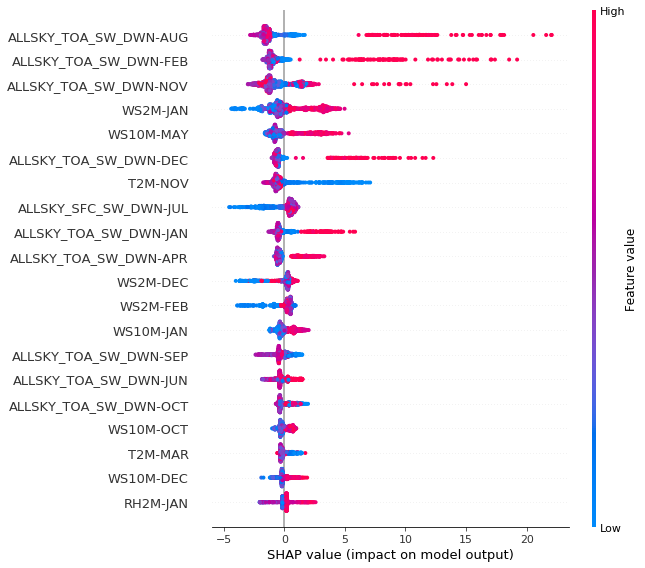

In [78]:
shap.summary_plot(shap_values_v2, train_t_selected)

In [79]:
y_train_predicted = RF_model_v2.predict(train_t_selected)

In [80]:
len(y_train_predicted)

1248

In [81]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [82]:
mean_absolute_percentage_error(y_train, y_train_predicted)

19.806669780135106

In [83]:
y_test_predicted = RF_model_v2.predict(test_t_selected)

In [84]:
mean_absolute_percentage_error(y_test, y_test_predicted)

29.522795784153804

In [85]:
plt.style.use('ggplot')

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


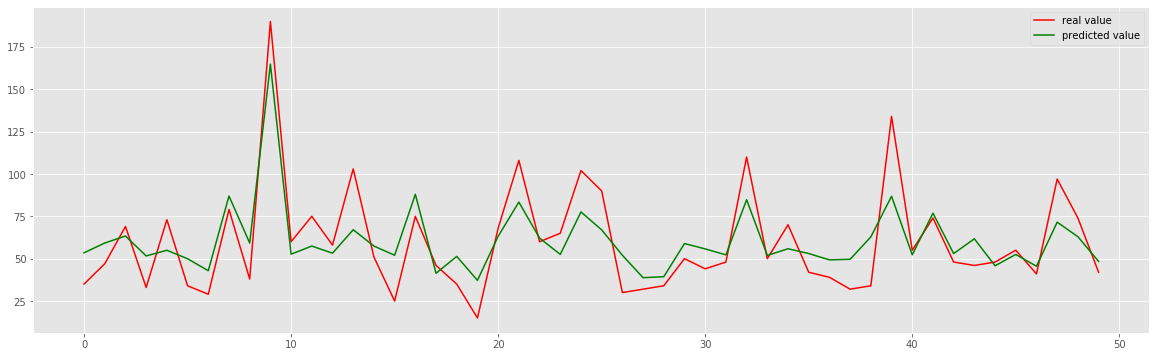

In [86]:
plt.figure(figsize=(20,6))
plt.plot(range(50), y_train[:50], color='r', label='real value')
plt.plot(range(50), y_train_predicted[:50], color='g', label='predicted value')
plt.legend()

In [87]:
len(y_test)

160

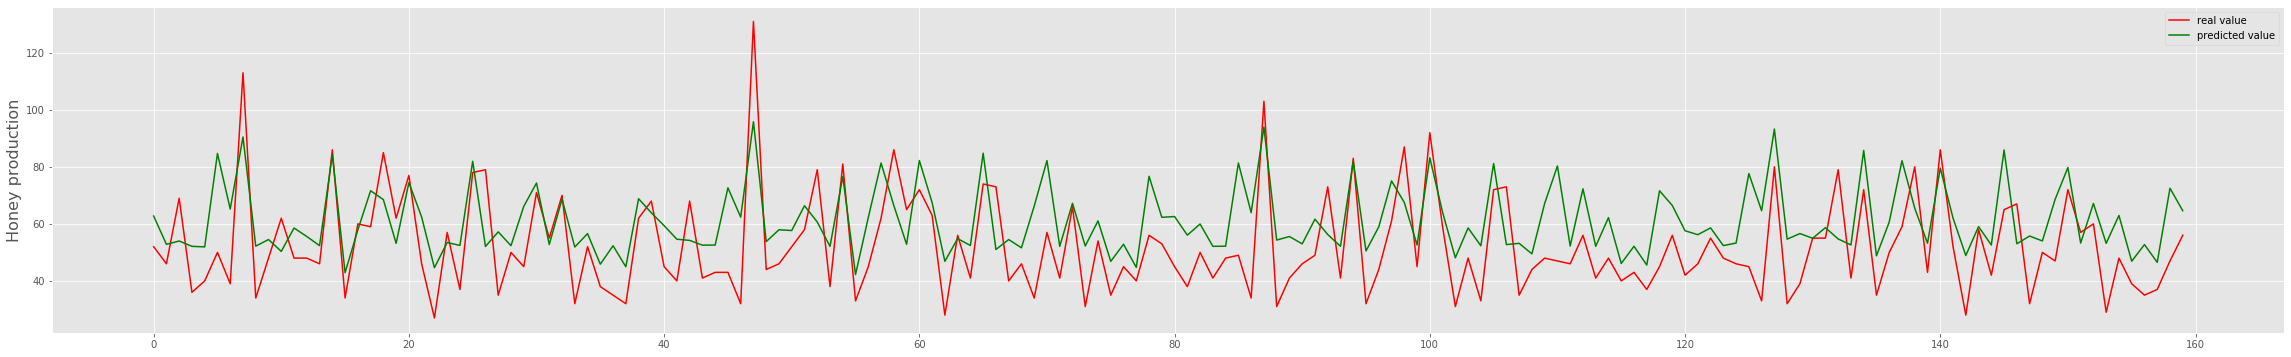

In [88]:
plt.figure(figsize=(40,6))
plt.plot(range(160), y_test, color='r', label='real value')
plt.plot(range(160), y_test_predicted, color='g', label='predicted value')
plt.ylabel('Honey production', size=16)
plt.legend()

In [97]:
def uncertainty_pred(model, X, percentile=95):

    '''
    This function is calculating the uncertainty related to the prediction using
    quantile random forest method, it return the percentile % confidence intervalle,
    as defined in the arguments
    '''

    #we initialize the upper and the lower error limits
    err_down = []
    err_up = []

    #we make the prediction of the intervalle for each example in the training data
    for x in range(len(X)):
        preds = []
        for pred in model.estimators_:
            preds.append(pred.predict([X[x]])[0])
        err_down.append(np.percentile(preds, (100 - percentile) / 2. ))
        err_up.append(np.percentile(preds, 100 - (100 - percentile) / 2.))

    return err_down, err_up

In [98]:
err_down, err_up = uncertainty_pred(RF_model_v2, train_t_selected.values, percentile=80)

In [99]:
np.mean([err_up[i]-err_down[i] for i in range(len(err_up))])

18.242844741261468

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


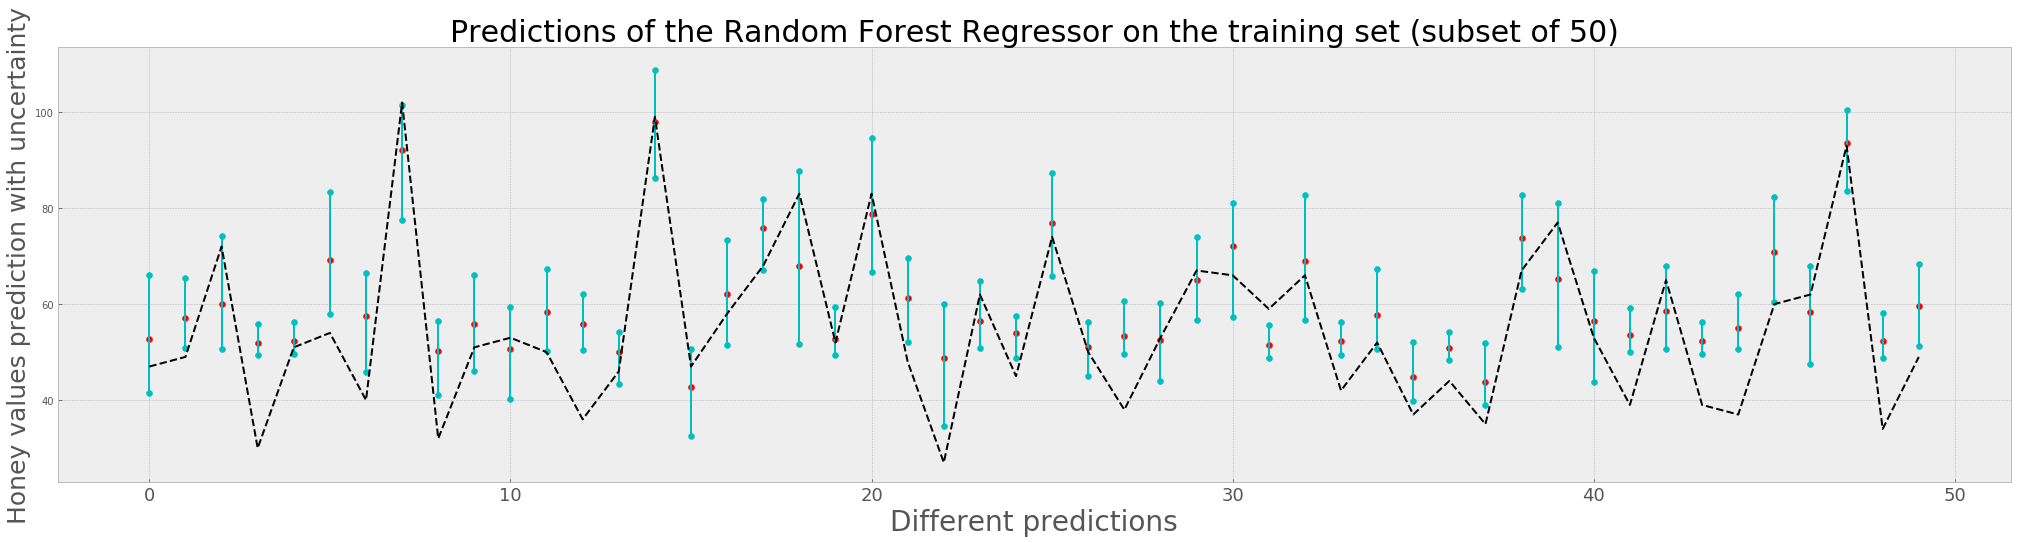

In [100]:
with plt.style.context('bmh'):
    plt.figure(figsize=(35,8))
    plt.vlines(range(50), err_down, err_up, colors='c', linestyles='solid')
    plt.scatter(range(50), err_down[:50], color='c')
    plt.scatter(range(50), err_up[:50], color='c')
    plt.scatter(range(50), y_train_predicted[:50], color='r')
    plt.plot(range(50), y_train[:50], color='black', ls='--')
    plt.xticks(size=18)
    plt.xlabel('Different predictions', size=28)
    plt.ylabel('Honey values prediction with uncertainty', size=25)
    plt.title('Predictions of the Random Forest Regressor on the training set (subset of 50)', size=30)

### Model for the number of colonies

In [48]:
X_train = dtf_month[~dtf_month['YEAR'].isin([2016, 2017, 2018, 2019])][dtf_month.columns.drop(['YEAR', 'HONEY', 'LBPERCOL', 'NUMCOL'])]
y_train = dtf_month[~dtf_month['YEAR'].isin([2016, 2017, 2018, 2019])]['NUMCOL']
y_train_lb = dtf_month[~dtf_month['YEAR'].isin([2016, 2017, 2018, 2019])]['LBPERCOL']

X_test = dtf_month[dtf_month['YEAR'].isin([2016, 2017, 2018, 2019])][dtf_month.columns.drop(['YEAR', 'HONEY', 'LBPERCOL', 'NUMCOL'])]
y_test = dtf_month[dtf_month['YEAR'].isin([2016, 2017, 2018, 2019])]['NUMCOL']
y_test_lb = dtf_month[dtf_month['YEAR'].isin([2016, 2017, 2018, 2019])]['LBPERCOL']

In [49]:
from sklearndf.transformation import OneHotEncoderDF, ColumnTransformerDF
from sklearn.compose import make_column_selector

In [50]:
preprocessing_categorical = PipelineDF(
    steps=[
        ("one-hot", OneHotEncoderDF(sparse=False, handle_unknown="ignore")),
    ]
)

preprocessing_numerical = PipelineDF(
    steps=[
        ("scaler", StandardScalerDF()),
    ]
)

In [52]:
import numpy as np

In [53]:
preprocessing_features = ColumnTransformerDF(
    transformers=[
        (
            "categorical",
            preprocessing_categorical,
            make_column_selector(dtype_include=object),
        ),
        (
            "numerical",
            preprocessing_numerical,
            make_column_selector(dtype_include=np.number),
        ),
    ]
)

In [54]:
#fit the transformer
preprocessing_features.fit(X_train)

ColumnTransformerDF(remainder='drop', sparse_threshold=0.3,
                    transformers=[('categorical',
                                   PipelineDF(memory=None,
                                              steps=[('one-hot',
                                                      OneHotEncoderDF(categories='auto',
                                                                      drop=None,
                                                                      dtype=<class 'numpy.float64'>,
                                                                      handle_unknown='ignore',
                                                                      sparse=False))]),
                                   <sklearn.compose._column_transformer.make_column_selector object at 0x152df16d0>),
                                  ('numerical',
                                   PipelineDF(memory=None,
                                              steps=[('scaler',
                       

In [55]:
# transform the data
train_t= preprocessing_features.transform(X_train)
test_t= preprocessing_features.transform(X_test)

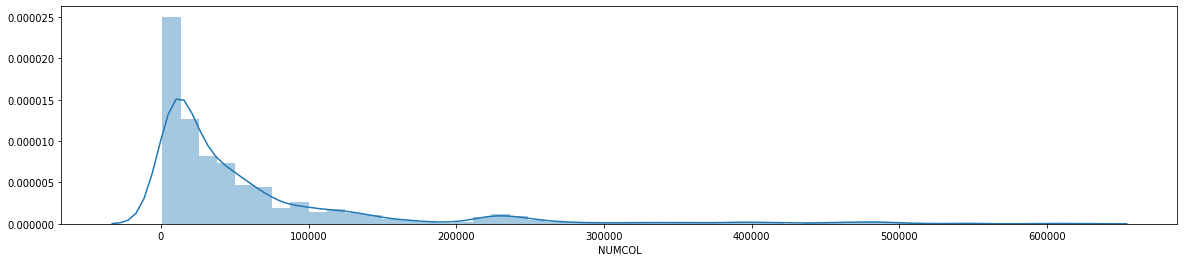

In [56]:
plt.figure(figsize=(20,4))
sns.distplot(y_train)

In [60]:
RF_model = RandomForestRegressor(max_depth=5, random_state=42, n_jobs=-3).fit(train_t, y_train)

In [61]:
explainer = shap.TreeExplainer(RF_model)
shap_values = explainer.shap_values(train_t)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


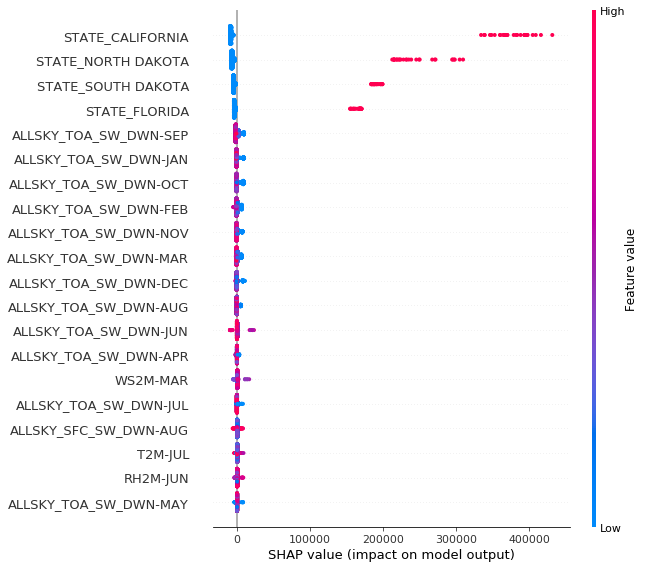

In [62]:
shap.summary_plot(shap_values, train_t)

In [139]:
dtf

YEAR    STATE  HONEY month  NUMCOL  ALLSKY_SFC_SW_DWN  \
0      2019  ALABAMA     42   APR    7000              19.85   
1      2019  ALABAMA     42   AUG    7000              20.60   
2      2019  ALABAMA     42   DEC    7000               7.86   
3      2019  ALABAMA     42   FEB    7000               9.21   
4      2019  ALABAMA     42   JAN    7000               8.91   
...     ...      ...    ...   ...     ...                ...   
16891  1987  WYOMING     74   MAR   39000              13.58   
16892  1987  WYOMING     74   MAY   39000              22.41   
16893  1987  WYOMING     74   NOV   39000               8.02   
16894  1987  WYOMING     74   OCT   39000              13.08   
16895  1987  WYOMING     74   SEP   39000              17.45   

       ALLSKY_TOA_SW_DWN  PRECTOT   RH2M    T2M  WS10M  WS2M  
0                  36.16   131.10  77.86  17.21   2.13  0.31  
1                  37.32    85.50  62.02  28.10   1.40  0.20  
2                  17.82   134.10  84.91   9.19   2.37  0.27  
3                  24.21   178.20  86.81  12.29   2.34  0.31  
4                  19.35   130.80  83.66   6.35   2.21  0.32  
...                  ...      ...    ...    ...    ...   ...  
16891              26.23    33.33  64.03  -1.47   5.04  3.64  
16892              39.41    64.17  49.06  12.98   3.43  2.37  
16893              14.71    27.82  62.58  -0.07   3.68  2.47  
16894              21.22    11.53  44.93   6.11   3.53  2.37  
16895              28.99    17.01  40.32  13.50   3.11  2.10  

[16896 rows x 12 columns]

In [145]:
dtf.groupby('STATE').median()[['NUMCOL']].sort_values(by='NUMCOL', ascending=False)

NUMCOL
STATE                   
CALIFORNIA      400000.0
NORTH DAKOTA    340000.0
SOUTH DAKOTA    245000.0
FLORIDA         220000.0
MONTANA         134000.0
MINNESOTA       132000.0
TEXAS           106000.0
IDAHO           100000.0
MICHIGAN         85000.0
GEORGIA          70000.0
WISCONSIN        68000.0
WASHINGTON       62000.0
NEW YORK         60000.0
OREGON           55000.0
NEBRASKA         50000.0
LOUISIANA        40000.0
WYOMING          39000.0
IOWA             37000.0
ARIZONA          35000.0
ARKANSAS         34000.0
COLORADO         31000.0
UTAH             28000.0
PENNSYLVANIA     26000.0
OHIO             18000.0
MISSISSIPPI      18000.0
MISSOURI         17000.0
NEW MEXICO       14500.0
KANSAS           14000.0
ALABAMA          13000.0
MASSACHUSETTS    13000.0
NORTH CAROLINA   12000.0
NEW JERSEY       11000.0
SOUTH CAROLINA   11000.0
NEVADA           10500.0
MAINE            10000.0
HAWAII            9000.0
ILLINOIS          9000.0
INDIANA           8000.0
TENNESSEE         7000.0
MARYLAND          7000.0
VIRGINIA          7000.0
WEST VIRGINIA     7000.0
OKLAHOMA          6000.0
VERMONT           6000.0
KENTUCKY          5000.0
CONNECTICUT       2000.0
NEW HAMPSHIRE     1000.0
RHODE ISLAND      1000.0
DELAWARE          1000.0